<h1 style="text-align: center"> Predicting UK Musicians' Income<h1>
    <h2 style="text-align: center">   EDA and ML personal project </h2>


## Overview

### Project Aims
I aimed to explore how many musicians are in fact able to earn a living from their music, and what factors correlate with success. Music is a challenging industry in which to earn a living, and there is a good deal of anecdotal advice and opinion about how best to achieve this. Through data exploration and machine-learning models, I sought to:
- Predict whether a musician will earn a living wage or above.
- Identify the key features in my dataset which correlated with musicians earning a living wage or above.

### Project outcomes summary
- Through thorough EDA, the number of features in the dataset was reduced from an initial 228 columns to just 11 columns.
- The final model could correctly predict 53% of those who would earn a living wage, which was a significant challenge as just 22% of respondents satisfy this condition.
- Key features were identified which correlated with higher incomes. These correlations were often non-linear.
 

    
The feature importances and correlations suggest that the most predictive features of a musician successfully earning over a living wage are:
    <ul>
        <li>Number of tracks available for streaming;</li>
        <li>Percentage of working time spent on music, where the EDA showed that those spending 60% of their working time earned the best across most metrics;</li>
        <li>Number of social media followers, where EDA showed that those with between 100,000 and 1,000,000 followers earned the best;</li>
        <li>Being signed to a major label.</li>
    </ul>
    
The feature importances and correlations suggest that the most predictive features of a musician earning less than a living wage are:
    <ul>
        <li>Identifying as a songwriter/composer;</li>
        <li>Number of inactive years in the last five.</li>
    </ul>
  
<center><img src="https://github.com/motekeatinge/musicians-income-personal-project/blob/main/feature_importances_correlations.JPG?raw=true"></center>
    
### The Dataset
The data used for this project was collected by the Competition & Markets Authority in the UK. It contains information on Uk-based musicians' self-reported activities and income. The survey was in a questionnaire format. The dataset included 710 respondents.

### Analytical process
The analysis was broken up into exploratory data analysis, training of baseline machine-learning models, then further exploratory data analysis and feature-selection to improve the type of model selected, and eliminate unnecessary features. This was highly successful, reducing the number of columns from 135 after the initial EDA to 11 after the second EDA. Finally, new models were trained and compared to one-another to select the highest performing option.

### Summary of the income data
The data shows that the vast majority of respondents earn little to nothing from music, with 78% earning less than £20,000 per year. For any given feature, even the most predictive, respondents report a wide range of incomes, suggesting that no single feature is consistently predictive of income.

### Summary of Model Performance
Initial models could not accurately predict income. After further EDA and feature-selection, and framing the question as a classification rather than a regression, models showed stronger performance, accurately predicting whether a respondent would earn a living wage or above 53% of the time. Of the classification models, an improvement from 33% to 53% recall was achieved by excluding less professional respondents, filtering the final dataframe for those spending at least 40% of their working time on music, and with multiple music income sources.


# Data preparation
<div style="background-color:LightSlateGray;
            font-size:105%;
            font-family:Verdana;
            color:white;
            padding:20px;
            border-radius:5px;">

<h4 style="font-size:115%;
    font-family:Verdana;
    color:white">The objective:</h4>
To gain a broad understanding of the dataset. To prepare the data for an initial round of EDA and machine-learning to establish baseline models from which to guide further EDA and model selection.

<h4 style="font-size:115%;
    font-family:Verdana;
    color:white">Summary of actions:</h4>
<ul>
<li> Identified the features and the large groupings of columns which the different possible answers to a single question</li>
<li> Split these groupings out into seperate sub-dataframes for easier feature-engineering and selection</li>
<li> Kept a dataframe of the remaining columns</li>
<li> Renamed columns where appropriate to make titles easier to read and refer to</li>
<li> One hot encoded dataframes where appropriate to prepare for machine learning</li>
<li> Reduced numbers of columns where possible by binning data together</li>
<li> Decided to drop some features entirely, reducing the column count</li>
<li> Dealt with null values</li>
<li> Deleted respondents where no target variable was provided</li>
<li> Ensured that data is numerical where I could do so without going to excessive lengths</li>
    </ul>
    </div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#How big is the dataframe?

df_musicians = pd.read_csv('/kaggle/input/uk-musicians-survey/UK_Creators__Earnings_Survey_Raw_Data.csv')
print(len(df_musicians.axes[0]))
print(len(df_musicians.axes[1]))

710
228


In [3]:
df_musicians.head()

,210409 UK Creators' Earnings Survey,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221,Unnamed: 222,Unnamed: 223,Unnamed: 224,Unnamed: 225,Unnamed: 226,Unnamed: 227
0,A1a_1,A1a_2,A1a_3,A1a_4,A1a_5,A1a_6,A1a_7,A1a_8,A1a_9,A1a_8_TEXT,...,A3_57,A3_55_TEXT,A3_56_TEXT,A3_57_TEXT,F1,F1_4_TEXT,F2,F3,F4,F5
1,Which of the following describe you as a music...,Which of the following describe you as a music...,Which of the following describe you as a music...,Which of the following describe you as a music...,Which of the following describe you as a music...,Which of the following describe you as a music...,Which of the following describe you as a music...,Which of the following describe you as a music...,Which of the following describe you as a music...,Which of the following describe you as a music...,...,We recognise that no genre list is comprehensi...,We recognise that no genre list is comprehensi...,We recognise that no genre list is comprehensi...,We recognise that no genre list is comprehensi...,Are you... - Selected Choice,Are you... - Prefer to self describe - Text,How would you describe your ethnic origin(s)?,What is the highest level of education you hav...,Approximately how many followers do you have a...,When you upload a piece of music to a streamin...
2,Songwriter/Composer,Vocalist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Other genre – Please state,NaN,NaN,Ska,Female,NaN,White British,Secondary School,I am not active on any social media platforms,NaN
3,Songwriter/Composer,Vocalist,Instrumentalist,NaN,NaN,NaN,Engineer,NaN,NaN,NaN,...,Other genre – Please state,NaN,NaN,Punk,Male,NaN,White British,Secondary School,101-1000,1000-10000
4,Songwriter/Composer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,NaN,White British,Secondary School,"1001-10,000",100-1000


## Initial observations

Starting with 228 columns. Will need to condense that to a more sensible amount.  
710 rows is fine.  
The top two rows don't contain useful information. Drop them.  
The second row contains the useful information. Is the first column a dummy column?  
There might be a way algorithmically to rename the columns better.  
In terms of the columns, some are quite well set up for one hot encoding already.  


In [4]:
'''

starting with 228 columns. May need to condense that to a more sensible amount
710 rows is fine
The top two rows don't contain useful information. Drop them
The second row contains the useful information. Is the first column a dummy column?
There might be a way algorithmically to rename the columns better.

In terms of the columns, some are quite well set up for one hot encoding already

'''

"\n\nstarting with 228 columns. May need to condense that to a more sensible amount\n710 rows is fine\nThe top two rows don't contain useful information. Drop them\nThe second row contains the useful information. Is the first column a dummy column?\nThere might be a way algorithmically to rename the columns better.\n\nIn terms of the columns, some are quite well set up for one hot encoding already\n\n"

In [5]:
#drop the top two rows and make the third row the title row
df_musicians.columns = df_musicians.iloc[1]
df_musicians = df_musicians[2:]

In [6]:
#rename non-unique columns in the original dataframe
df_musicians.columns.values[38] = f'{df_musicians.columns.values[38]} 1'
df_musicians.columns.values[210] = f'{df_musicians.columns.values[210]} 1'
df_musicians.columns.values[220] = f'{df_musicians.columns.values[220]} 2'

In [7]:
#These are the large column groupings

df_cat_1_creatortype = df_musicians.iloc[:,0:10]
df_cat_2_careerregion = df_musicians.iloc[:,15:23]
df_cat_3_collaboration = df_musicians.iloc[:,23:29]
df_cat_4_labelrelationship = df_musicians.iloc[:,31:38]
df_cat_5_inactiveyears = df_musicians.iloc[:,41:84]
df_cat_6_incomesourcepercentage = df_musicians.iloc[:,95:114]
df_cat_7_incomesourcespre2015 = df_musicians.iloc[:,114:133]
df_cat_8_recordfunding = df_musicians.iloc[:,135:146]
df_cat_9_selfdistributionmethod = df_musicians.iloc[:,148:153]
df_cat_10_platformsuploadedto = df_musicians.iloc[:,159:177]
df_cat_11_creatorrole = df_musicians.iloc[:,177:184]
df_cat_12_genre = df_musicians.iloc[:,193:222]

In [8]:
# I only want any data where there is a value, I don't need the NaN values
# Are there any columns that are all NaN?
# the 'None' column in the creatortype category can be dropped, as all values are NaN
# The 'Other' column seems like it could be tricky. What's in that?

df_cat_1_creatortype.isnull().sum()
other_values = df_cat_1_creatortype['Which of the following describe you as a music creator? - Other (Please specify) - Text'].dropna()

#other_values

In [9]:
#They're all different, so I think I'll just have an 'other' category but won't be more specific than that.

In [10]:
#this reduces the number of columns from 228 to 46

all_intersections_dict = {}
all_intersections_list = []
df_musicians_copy = df_musicians.copy(deep=True)

all_intersections_dict['cat1intersect'] = df_musicians_copy.columns.intersection(df_cat_1_creatortype.columns)
all_intersections_dict['cat2intersect'] = df_musicians_copy.columns.intersection(df_cat_2_careerregion.columns)
all_intersections_dict['cat3intersect'] = df_musicians_copy.columns.intersection(df_cat_3_collaboration.columns)
all_intersections_dict['cat4intersect'] = df_musicians_copy.columns.intersection(df_cat_4_labelrelationship.columns)
all_intersections_dict['cat5intersect'] = df_musicians_copy.columns.intersection(df_cat_5_inactiveyears.columns)
all_intersections_dict['cat6intersect'] = df_musicians_copy.columns.intersection(df_cat_6_incomesourcepercentage.columns)
all_intersections_dict['cat7intersect'] = df_musicians_copy.columns.intersection(df_cat_7_incomesourcespre2015.columns)
all_intersections_dict['cat8intersect'] = df_musicians_copy.columns.intersection(df_cat_8_recordfunding.columns)
all_intersections_dict['cat9intersect'] = df_musicians_copy.columns.intersection(df_cat_9_selfdistributionmethod.columns)
all_intersections_dict['cat10intersect'] = df_musicians_copy.columns.intersection(df_cat_10_platformsuploadedto.columns)
all_intersections_dict['cat11intersect'] = df_musicians_copy.columns.intersection(df_cat_11_creatorrole.columns)
all_intersections_dict['cat12intersect'] = df_musicians_copy.columns.intersection(df_cat_12_genre.columns)

for i in all_intersections_dict:
    for k in all_intersections_dict[i]:
        all_intersections_list.append(k)
        
df_musicians_copy.drop(columns=all_intersections_list, inplace=True)
print(len(df_musicians_copy.axes[1]))

46


I now have dataframes of all of the large column categories:

df_cat_1_creatortype  
df_cat_2_careerregion  
df_cat_3_collaboration  
df_cat_4_labelrelationship  
df_cat_5_inactiveyears  
df_cat_6_incomesourcepercentage  
df_cat_7_incomesourcespre2015  
df_cat_8_recordfunding  
df_cat_9_selfdistributionmethod  
df_cat_10_platformsuploadedto  
df_cat_11_creatorrole  
df_cat_12_genre  

And a dataframe without all of those columns:

df_musicians_copy


In [11]:
'''
get rid of unecessary columns in the sub-dataframes, and one-hot encode
'''

'\nget rid of unecessary columns in the sub-dataframes, and one-hot encode\n'

In [12]:
#just to check that all of the 'others' are captured in column seven, so I can drop column 8
print(df_cat_1_creatortype['Which of the following describe you as a music creator? - Selected Choice - Other (Please specify)'].isnull().sum())
print(df_musicians['Which of the following describe you as a music creator? - Selected Choice - Other (Please specify)'].isnull().sum())

693
693


In [13]:
#get rid of the last two columns
#rename the remaining columns
#reset the index to be correct

cat_1_titles = ['Songwriter/Composer', 'Vocalist', 'Instrumentalist', 'Producer', 'DJ', 'Rapper/MC', 'Engineer', 'Other']
df_cat_1_creatortype.drop(columns=['Which of the following describe you as a music creator? - Selected Choice - None, I\'m not a music creator', 'Which of the following describe you as a music creator? - Other (Please specify) - Text'], inplace=True)
df_cat_1_creatortype.columns = cat_1_titles
df_cat_1_creatortype.index = range(len(df_cat_1_creatortype.index))


/tmp/ipykernel_21/1721721134.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat_1_creatortype.drop(columns=['Which of the following describe you as a music creator? - Selected Choice - None, I\'m not a music creator', 'Which of the following describe you as a music creator? - Other (Please specify) - Text'], inplace=True)


In [14]:
df_cat_1_creatortype_OH = pd.get_dummies(df_cat_1_creatortype)
df_cat_1_creatortype_OH.columns = cat_1_titles

In [15]:
df_cat_2_careerregion.isnull().sum()
#disregarding this as it is almost all null

1
Which of the following countries/regions is your music career based in (i.e. where you earn money from your music)? \nYou can select more than one option. - Africa                       708
Which of the following countries/regions is your music career based in (i.e. where you earn money from your music)? \nYou can select more than one option. - Asia                         708
Which of the following countries/regions is your music career based in (i.e. where you earn money from your music)? \nYou can select more than one option. - Australia and New Zealand    708
Which of the following countries/regions is your music career based in (i.e. where you earn money from your music)? \nYou can select more than one option. - Europe (excluding UK)        707
Which of the following countries/regions is your music career based in (i.e. where you earn money from your music)? \nYou can select more than one option. - South America                708
Which of the following countries/regions is your

In [16]:
df_cat_3_collaboration
cat_3_titles = ['Collab - Solo artist', 'Collab - Duo member', 'Collab - Trio member', 'Collab - Band member', 'Collab - Ensemble/group member', 'Collab - Other']
df_cat_3_collaboration.index = range(len(df_cat_3_collaboration.index))
df_cat_3_collaboration_OH = pd.get_dummies(df_cat_3_collaboration)
df_cat_3_collaboration_OH.columns = cat_3_titles
df_cat_3_collaboration.columns = cat_3_titles


In [17]:
df_cat_4_labelrelationship.head()
cat_4_titles = ['Signed to major label', 'Signed to indie label', 'Previously signed to major', 'Previously signed to indie', 'Self-release\DIY', 'Label relationship - Other', 'Other - text']
#The Other - Text column contains interesting information but can't be one hot encoded

df_cat_4_labelrelationship.index = range(len(df_cat_4_labelrelationship.index))


df_cat_4_labelrelationship.columns = cat_4_titles
df_cat_4_labelrelationship_OH = pd.get_dummies(df_cat_4_labelrelationship.iloc[:,:6])
df_cat_4_labelrelationship_OH.columns = cat_4_titles[:6]


In [18]:
#To create a years titles list, I should automatically generate a list with a range of years
years_list = []
for year in range(1980, 2021 +1):
    years_list.append(year)
    
cat_5_titles = ['pre-1980']+years_list

df_cat_5_inactiveyears.index = range(len(df_cat_5_inactiveyears.index))

df_cat_5_inactiveyears_OH = pd.get_dummies(df_cat_5_inactiveyears)
df_cat_5_inactiveyears_OH.columns = cat_5_titles
df_cat_5_inactiveyears_OH.head()

#It would be nice to create a more condensed measure of inactivity that considers both recency and total years
#aggregate inactive years together into bins

,pre-1980,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [19]:
inactiveyears_1980_84 = df_cat_5_inactiveyears_OH.loc[:,1980:1984].sum(axis=1)
inactiveyears_1985_89 = df_cat_5_inactiveyears_OH.loc[:,1985:1989].sum(axis=1)
inactiveyears_1990_94 = df_cat_5_inactiveyears_OH.loc[:,1990:1994].sum(axis=1)
inactiveyears_1995_99 = df_cat_5_inactiveyears_OH.loc[:,1995:1999].sum(axis=1)
inactiveyears_2000_04 = df_cat_5_inactiveyears_OH.loc[:,2000:2004].sum(axis=1)
inactiveyears_2005_09 = df_cat_5_inactiveyears_OH.loc[:,2005:2009].sum(axis=1)
inactiveyears_2010_14 = df_cat_5_inactiveyears_OH.loc[:,2010:2014].sum(axis=1)
inactiveyears_2015_21 = df_cat_5_inactiveyears_OH.loc[:,2015:2021].sum(axis=1)

inactiveyears_totals = [
    df_cat_5_inactiveyears_OH['pre-1980'],
    inactiveyears_1980_84,
    inactiveyears_1985_89,
    inactiveyears_1990_94,
    inactiveyears_1995_99,
    inactiveyears_2000_04,
    inactiveyears_2005_09,
    inactiveyears_2010_14,
    inactiveyears_2015_21
]

inactiveyears_titles = ['Inactive years - Pre-1980','Inactive years - 1980-84','Inactive years - 1985-89','Inactive years - 1990-94','Inactive years - 1995-99','Inactive years - 2000-2004','Inactive years - 2005-09','Inactive years - 2010-14','Inactive years - 2015-21']
df_cat_5_inactiveyears_condensed_OH = pd.concat(inactiveyears_totals, axis=1)
df_cat_5_inactiveyears_condensed_OH.columns = inactiveyears_titles

In [20]:
#As this one is a percentage, it doesn't get one hot encoded
cat6_shared_text = 'In 2019 you earned [QID15-ChoiceGroup-SelectedAnswers-2].\n\n\n\nHow did the income you generated from your music career split across the following sources?\n\n\nYour answer must add up to 100%. If there are any you don\'t do, please put 0.If you aren\'t sure, please make your best estimate. - '
cat_6_titles = [col.replace(cat6_shared_text, '2019 income source percentage - ') for col in df_cat_6_incomesourcepercentage.columns]
df_cat_6_incomesourcepercentage.columns =  cat_6_titles
df_cat_6_incomesourcepercentage.index = range(len(df_cat_6_incomesourcepercentage.index))
df_cat_6_incomesourcepercentage.fillna(0, inplace=True)


/tmp/ipykernel_21/655754085.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat_6_incomesourcepercentage.fillna(0, inplace=True)


In [21]:
df_cat_6_incomesourcepercentage2019 = df_cat_6_incomesourcepercentage

In [22]:
#This requires the same approach with the titles as cat 6, and again is a percentage, so can't one hot encode
#there are quite a lot of null values (298 per column, which seems strange), which I will set to 0
cat7_shared_text = 'You said you were earning approximately [QID20-ChoiceGroup-SelectedChoices] a year before the use of online music streaming services was widespread (2015).\n\n \nThinking about your earnings during this time, how did the income you generated from your music career typically split across the following sources?\n\n\n\nYour answer must add up to 100%. If there are any you don\'t do, please put 0. If you aren\'t sure, please make your best estimate. - '
cat_7_titles = [col.replace(cat7_shared_text, 'pre-2015 income source percentage - ') for col in df_cat_7_incomesourcespre2015.columns]
df_cat_7_incomesourcespre2015.columns = cat_7_titles
df_cat_7_incomesourcespre2015.index = range(len(df_cat_7_incomesourcespre2015.index))
df_cat_7_incomesourcespre2015.fillna(0, inplace=True)
df_cat_7_incomesourcespre2015.head()

/tmp/ipykernel_21/3383310228.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat_7_incomesourcespre2015.fillna(0, inplace=True)


,pre-2015 income source percentage - Live performances,pre-2015 income source percentage - Audio streaming royalties,pre-2015 income source percentage - Video streaming royalties,pre-2015 income source percentage - Other online revenue (e.g. ads/promo etc.),pre-2015 income source percentage - Digital sales (e.g. downloads),pre-2015 income source percentage - Physical sales (e.g. CD and vinyl),pre-2015 income source percentage - Brand/sponsorship deals,"pre-2015 income source percentage - Direct licensing/sync (e.g. use of music in film, TV, games etc.)",pre-2015 income source percentage - Session or orchestral work (e.g. studio recordings),"pre-2015 income source percentage - Advances (e.g. recording, publishing advance)",pre-2015 income source percentage - Teaching music,pre-2015 income source percentage - Broadcast (e.g. radio and TV use of your music),pre-2015 income source percentage - Merchandise,pre-2015 income source percentage - Mechanical royalties,pre-2015 income source percentage - Public performance (e.g. music played in shops),"pre-2015 income source percentage - Commissions for broadcast/other media (e.g. TV programmes, films, games)",pre-2015 income source percentage - Commissions for stage (e.g. theatre productions),pre-2015 income source percentage - Printed music sales/hire,pre-2015 income source percentage - Other
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,20,10,0,20,10,0,0,0,20,0,0,0,0,0,0,0,20,0


In [23]:
#This one will one hot encode
cat8_shared_text = 'How do you typically fund your recordings?\n\n\n\nPlease select all that apply. - '
cat_8_titles = [col.replace(cat8_shared_text, '') for col in df_cat_8_recordfunding.columns]

df_cat_8_recordfunding.index = range(len(df_cat_8_recordfunding.index))
df_cat_8_recordfunding_OH = pd.get_dummies(df_cat_8_recordfunding)
df_cat_8_recordfunding_OH.columns = cat_8_titles

#dropping this entirely

In [24]:
df_cat_9_selfdistributionmethod.head()
#I feel like this is a bit of an esoteric category so I'll leave it for now, and not include it in my analysis

1,"How do you distribute your self-released recordings? - Selected Choice - Distributor (e.g. CD Baby, Ditto Music, Distrokid; Tunecore)","How do you distribute your self-released recordings? - Selected Choice - Distributor with enhanced services (marketing, label services, physical distribution) (e.g. AWAL, Ditto Music Plus)","How do you distribute your self-released recordings? - Selected Choice - I distribute my music directly via digital platforms (e.g. Soundcloud, YouTube)",How do you distribute your self-released recordings? - Selected Choice - I distribute my music (digital and physical) directly via digital platforms (e.g. Bandcamp),"How do you distribute your self-released recordings? - Selected Choice - Other, please specify"
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,I distribute my music (digital and physical) d...,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,"Distributor (e.g. CD Baby, Ditto Music, Distro...",NaN,NaN,NaN,NaN


In [25]:
#cat 10 seems a similarly esoteric category, which I'll leave out

In [26]:
cat11_shared_text = 'How would you describe your role on the music tracks you\'ve been involved in creating that have been uploaded to streaming platforms?\n \n\nYou can select more than one. - '
cat_11_titles = [col.replace(cat11_shared_text, 'Role in tracks available for streaming - ') for col in df_cat_11_creatorrole.columns]

df_cat_11_creatorrole.index = range(len(df_cat_11_creatorrole.index))
df_cat_11_creatorrole_OH = pd.get_dummies(df_cat_11_creatorrole)
df_cat_11_creatorrole_OH.columns = cat_11_titles
df_cat_11_creatorrole_OH.head()

,Role in tracks available for streaming - Composer/songwriter,Role in tracks available for streaming - Performer: featured artist,Role in tracks available for streaming - Performer: session or orchestral musician,Role in tracks available for streaming - Producer,Role in tracks available for streaming - Engineer,Role in tracks available for streaming - DJ,Role in tracks available for streaming - Other
0,False,False,False,False,False,False,False
1,True,True,True,True,True,False,False
2,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False


In [27]:
#I'll drop the last four columns as they are text-based and will mess up the one hot encoder

df_cat_12_genre.drop(columns=df_cat_12_genre.iloc[:,25:29].columns, inplace=True)

cat12_shared_text = 'We recognise that no genre list is comprehensive or definitive: ours is no different. If you don\'t see an appropriate genre listed please enter those you most closely identify with in the text boxes at the bottom of the list. Or combine genres from the list with other genres/subgenres not listed.\n\n\n\nPlease choose up to 3 options. - Selected Choice - '
cat_12_titles = [col.replace(cat12_shared_text, 'Creator genre - ') for col in df_cat_12_genre.columns]

#print(df_cat_12_genre.drop(df_cat_12_genre.iloc[:,25:29]))
df_cat_12_genre.index = range(len(df_cat_12_genre.index))
df_cat_12_genre_OH = pd.get_dummies(df_cat_12_genre)
df_cat_12_genre_OH.columns = cat_12_titles
df_cat_12_genre_OH.drop(columns=['Creator genre - Other genre - Please state', 'Creator genre - Other genre – Please state 1'], inplace=True)


/tmp/ipykernel_21/1621364889.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat_12_genre.drop(columns=df_cat_12_genre.iloc[:,25:29].columns, inplace=True)


In [28]:
#Make sure the indexes match of the main dataframe and these sub dataframes
df_musicians_copy.index = range(len(df_musicians_copy.index))

### Final sub-dataframes to use, and their format:  
  
df_cat_1_creatortype_OH  
df_cat_3_collaboration_OH  
df_cat_4_labelrelationship_OH  
df_cat_5_inactiveyears_condensed_OH  
df_cat_6_incomesourcepercentage2019  
df_cat_7_incomesourcespre2015  
df_cat_11_creatorrole_OH  
df_cat_12_genre_OH  



Sub-dataframes not to include: 
  
Category 9  
Category 8  
Category 2  
Category 10  

In [29]:
'''
actions:

What's in columns 7-8?
    Nothing useful, drop both
combine 12, 13, 14 for total earnings
shorten column 18 name
check null values in the columns to see if there are any mostly empty
check what the values are in column, 36, consider dropping
drop 38
drop 39
what's in columns 40-41?
rename columns 16 and 17 to shorten
'''

df_musicians_copy.drop(columns=['What is the main royalty rate? - Selected Choice 1', 'What is the main royalty rate? - Royalty rate - Text'], inplace=True)


In [30]:
#print(df_musicians_copy.iloc[:,10:14])
#df_musicians_copy.head()

#I will set each of these ranges just to their maximum value, which will preserve the information that it's a range

#print(df_musicians_copy.iloc[:,10].value_counts())

df_musicians_copy.rename(columns = {
    'Approximately how much did you personally earn overall from your music career (before taxes) in each of the past 3 years?\n \n\nIf some of your income is from advances received prior to or during this period, please allow for how this is apportioned to each of the 3 years. - 2018':'Earnings - 2018',
    'Approximately how much did you personally earn overall from your music career (before taxes) in each of the past 3 years?\n \n\nIf some of your income is from advances received prior to or during this period, please allow for how this is apportioned to each of the 3 years. - 2019':'Earnings - 2019',
    'Approximately how much did you personally earn overall from your music career (before taxes) in each of the past 3 years?\n \n\nIf some of your income is from advances received prior to or during this period, please allow for how this is apportioned to each of the 3 years. - 2020':'Earnings - 2020'
}, inplace=True) 


In [31]:
df_musicians_copy['Earnings - 2018'].replace(
{
    '£1 - 1,000':1,
    '£1,001 - £5,000':1001,
    '£5,001 - £10,000':5001,
    '£10,001 - £20,000':10001,
    '£20,001 - £30,000':20001,
    '£30,001 - £40,000':30001,
    '£40,001 - £50,000':40001,
    '£50,001 - £75,000':50001,
    '£75,001 - £100,000':75001,
    '£100,000.00':100000,
    
}
)

#These will be my categories. Take an average across three years for an average yearly income, then fit into the existing categories

0                               1
1      Prefer not to say/not sure
2                               1
3                            5001
4                           50001
                  ...            
703                             1
704                          1001
705                        100000
706                             1
707                             1
Name: Earnings - 2018, Length: 708, dtype: object

In [32]:
#I'll have to delete the not sures and the not applicables. There's just nothing to predict there.

In [33]:
filtercondition = (df_musicians_copy['Earnings - 2018'] == 'Prefer not to say/not sure') | (df_musicians_copy['Earnings - 2018'] == 'Not applicable') | (df_musicians_copy['Earnings - 2019'] == 'Prefer not to say/not sure') | (df_musicians_copy['Earnings - 2019'] == 'Not applicable') | (df_musicians_copy['Earnings - 2020'] == 'Prefer not to say/not sure') | (df_musicians_copy['Earnings - 2020'] == 'Not applicable')

df_musicians_copy.drop(df_musicians_copy[filtercondition].index)
income_answers_to_drop = df_musicians_copy[filtercondition].index


In [34]:
#dropping unwanted columns
columns_to_drop = [
    'How do you distribute your self-released recordings? - Other, please specify - Text',
    'What is the main royalty rate? - Selected Choice',
    'To what extent do you understand your music streaming royalties?',
    'To what extent is it easy or difficult is it to find out about your royalties from streaming?',
    'How do you distribute your self-released recordings? - Other, please specify - Text',
    'Are you... - Prefer to self describe - Text',
    'Is there anything else you\'d like to tell us?'
] 
df_musicians_copy.drop(columns=columns_to_drop, inplace=True)


In [35]:
#rename the columns more concisely
df_musicians_copy.rename(columns={
    'We\'re interested to learn about your music earnings before online music streaming became widespread (2015).\n\n\n\nIn our study, we use the year 2015 as the tipping point for audio streaming becoming mainstream because: 2015 was the first year since 2001 that the international recording industry reported annual sectoral growth and also the first year that digital revenue overtook revenue from physical formats. In addition to this, 2015 was the first year that audio subscription streaming accounted for more than 20% of the UK market for recorded music.\n\n\n\n Did you earn money from your music prior to this time?':'Earned money from music before 2015',
    'We recognise that the Covid-19 pandemic has impacted many creators and their careers. If the pandemic has affected you, please answer about the time before (i.e. 2019) below.\n\n\n\nWhich of the following best describes you in relation to your music work usually...':'How much does music contribute to your income?',
    'As 2020 may not have been a normal year for some music creators financially, we would like you to think about your income from 2019.\n\n\n\nApproximately what percentage of your working time did you spend on activities relating to your music career in 2019?':'Percentage of working time spent on music in 2019',
    'Are you... - Selected Choice':'Gender (M/F)',
    'What is the main royalty rate? - Main royalty rate - Text':'Main royalty rate',
    'Is the amount of time you spent working on your music career in 2019 typical of other years?\n\n \n\nTypically I have spent...':'Amount of time spent on music in 2019 compared to other years',
    'How did your music earnings split across money earned in the UK and internationally in 2019?\n \n\nYour answer must add up to 100%. If you aren\'t sure, please make your best estimate. - UK':'Earnings split: UK',
    'How did your music earnings split across money earned in the UK and internationally in 2019?\n \n\nYour answer must add up to 100%. If you aren\'t sure, please make your best estimate. - International':'Earnings split: international',
    'And in the years before streaming was widespread (i.e. 2015) what, on average, best describes you in relation to the money spent vs money made on your music career?':'Money spent vs money made on music pre-2015',
    'When you upload a piece of music to a streaming platform, on average, how many plays does it get after about a month of being available online?\nPlease count plays across all platforms to estimate the total number.':'Average streaming plays of a new work in first month'
}, inplace=True)

In [36]:
#insert the columns from creatortype at the desired location
for col_name, col_data in df_cat_1_creatortype_OH.items():
    df_musicians_copy.insert(0, col_name, col_data)

In [37]:
#rename the 'Other to be more descriptive'
df_musicians_copy.rename(columns={'Other':'Creator type: other'}, inplace=True)
df_musicians_copy.drop(columns='And which would you consider to be your main focus? - Other (Please specify) - Text', inplace=True)
#get it in the right place
col_to_move = df_musicians_copy.pop('Creator type: other')
df_musicians_copy.insert(7,'Creator type: other',col_to_move)


## Sub-dataframes to use
df_cat_1_creatortype_OH  
df_cat_3_collaboration_OH  
df_cat_4_labelrelationship_OH  
df_cat_5_inactiveyears_condensed_OH  
df_cat_6_incomesourcepercentage2019  
df_cat_7_incomesourcespre2015  
df_cat_11_creatorrole_OH  
df_cat_12_genre_OH  
  
## Concatenating and creating average income target feature

In [38]:
for col_name, col_data in df_cat_3_collaboration_OH.items():
    df_musicians_copy.insert(8+1, col_name, col_data)

col_to_move = df_musicians_copy.pop('Collab - Other')
df_musicians_copy.insert(14, 'Collab - Other', col_to_move)


In [39]:
#Add the columns in reverse order instead so that they end up in the right order
for col_name, col_data in df_cat_4_labelrelationship_OH.iloc[:,::-1].items():
    df_musicians_copy.insert(15, col_name, col_data)

In [40]:
for col_name, col_data in df_cat_5_inactiveyears_condensed_OH.iloc[:,::-1].items():
    df_musicians_copy.insert(26, col_name, col_data)


In [41]:
for col_name, col_data in df_cat_6_incomesourcepercentage2019.iloc[:,::-1].items():
    df_musicians_copy.insert(38, col_name, col_data)

In [42]:
for col_name, col_data in df_cat_7_incomesourcespre2015.iloc[:,::-1].items():
    df_musicians_copy.insert(66, col_name, col_data)

In [43]:
for col_name, col_data in df_cat_11_creatorrole_OH.iloc[:,::-1].items():
    df_musicians_copy.insert(94, col_name, col_data)

In [44]:
for col_name, col_data in df_cat_12_genre_OH.iloc[:,::-1].items():
    df_musicians_copy.insert(9, col_name, col_data)

In [45]:
#Are there any more columns with a lot of nulls that I can get rid of before the final analysis?
for value in df_musicians_copy:
    print(df_musicians_copy[value].isnull().sum(), value)

#the 'Main royalty rate' has 533 null values, but these may be significant in determining income nevertheless

0 Engineer
0 Rapper/MC
0 DJ
0 Producer
0 Instrumentalist
0 Vocalist
0 Songwriter/Composer
0 Creator type: other
415 And which would you consider to be your main focus? - Selected Choice
0 Creator genre - Afrobeat
0 Creator genre - Classical (Western)
0 Creator genre - Classical (Non-Western)
0 Creator genre - Country
0 Creator genre - Desi
0 Creator genre - East Asian
0 Creator genre - Electronic Dance Music
0 Creator genre - Folk
0 Creator genre - Grime
0 Creator genre - Hip Hop
0 Creator genre - Indie
0 Creator genre - Jazz
0 Creator genre - Latin
0 Creator genre - Metal
0 Creator genre - Multi-genre, e.g. function band
0 Creator genre - Pop
0 Creator genre - Punk
0 Creator genre - R&B
0 Creator genre - Reggae
0 Creator genre - Rock
0 Creator genre - Soul
0 Creator genre - Traditional (English, Irish, Scottish, Welsh)
0 Creator genre - Traditional (Non-UK and Ireland)
0 Collab - Ensemble/group member
0 Collab - Band member
0 Collab - Trio member
0 Collab - Duo member
0 Collab - Solo 

In [46]:
#Now I drop out the rows without a target value

filtercondition = (df_musicians_copy['Earnings - 2018'] == 'Prefer not to say/not sure') | (df_musicians_copy['Earnings - 2018'] == 'Not applicable') | (df_musicians_copy['Earnings - 2019'] == 'Prefer not to say/not sure') | (df_musicians_copy['Earnings - 2019'] == 'Not applicable') | (df_musicians_copy['Earnings - 2020'] == 'Prefer not to say/not sure') | (df_musicians_copy['Earnings - 2020'] == 'Not applicable')

income_answers_to_drop = df_musicians_copy[filtercondition].index
df_musicians_target = df_musicians_copy.drop(income_answers_to_drop)

cols_to_move = df_musicians_target[['Earnings - 2018', 'Earnings - 2019', 'Earnings - 2020']]
df_musicians_target.drop(['Earnings - 2018', 'Earnings - 2019', 'Earnings - 2020'], axis=1, inplace=True)
df_musicians_target = pd.concat([df_musicians_target, cols_to_move], axis=1)

In [47]:
#Create an average column of the incomes
#First, turn the incomes into integer values for summing

earnings_lower_bounds = {
    '£1 - 1,000':1,
    '£1,001 - £5,000':1001,
    '£5,001 - £10,000':5001,
    '£10,001 - £20,000':10001,
    '£20,001 - £30,000':20001,
    '£30,001 - £40,000':30001,
    '£40,001 - £50,000':40001,
    '£50,001 - £75,000':50001,
    '£75,001 - £100,000':75001,
    '£100,000.00':100000,
    
}

for column in df_musicians_target[['Earnings - 2018', 'Earnings - 2019', 'Earnings - 2020']]:
    df_musicians_target[column].replace(
    earnings_lower_bounds,
    inplace=True
    )

for column in df_musicians_target[['Earnings - 2018', 'Earnings - 2019', 'Earnings - 2020']]:
    df_musicians_target[column].replace(
    {'I did not earn anything from music in this year':0},
    inplace=True
    )

In [48]:
#reset the index so that the next function doesn't get an out of range error
df_musicians_target.index = range(len(df_musicians_target.index))

In [49]:
#Create and insert an average column

'''for row in df_musicians_target.index:
    print(df_musicians_target[['Earnings - 2018', 'Earnings - 2019', 'Earnings - 2020']].iloc[row].sum())'''
total_annual_income = []

for row in df_musicians_target.index:
    total_annual_income.append(df_musicians_target[['Earnings - 2018', 'Earnings - 2019', 'Earnings - 2020']].iloc[row].sum())
    
average_annual_income = [(x / 3).round() for x in total_annual_income]
average_annual_income
df_musicians_target['Average annual income'] = average_annual_income


/tmp/ipykernel_21/896978214.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_musicians_target['Average annual income'] = average_annual_income


In [50]:
df_musicians_target_averaged = df_musicians_target.drop(['Earnings - 2018', 'Earnings - 2019', 'Earnings - 2020'], axis=1)

# Exploratory Data Analysis

<div style="background-color:LightSlateGray;
            font-size:105%;
            font-family:Verdana;
            color:white;
            padding:20px;
            border-radius:5px;">

<h4 style="font-size:115%;
    font-family:Verdana;
    color:white">The objective:</h4>
To start establishing what features correlate with the target variable and understanding the relationships within the dataset.

<h4 style="font-size:115%;
    font-family:Verdana;
    color:white">Summary of actions:</h4>
<ul>
    <li> Established the overall distribution of incomes</li>
    <li> Graphed the distribution of incomes</li>
    <li> Graphed and summarised key features:</li>  
    <li style="padding-left:20px;
               list-style-position: inside"> Number of respondents in each creator type category such as composer, rapper etc.</li>
    <li style="padding-left:20px;
               list-style-position: inside"> Average incomes by creator type category</li>
    <li style="padding-left:20px;
               list-style-position: inside"> Average incomes by dependency on music income</li>
    <li style="padding-left:20px;
               list-style-position: inside"> Average incomes by collaboration status such as band member, duo member etc.</li>
    <li style="padding-left:20px;
               list-style-position: inside"> Average incomes by percentage of working time spent on music, binned together into four ranges.</li>
    <li style="padding-left:20px;
               list-style-position: inside"> More granular graphing of average incomes by percentage of working time spent on music.</li>
</ul>
</div>

In [51]:
average_annual_income.sort()

#x would be all of the musicians
#y would be their earnings

x = range(len(df_musicians_target_averaged.index))
y = average_annual_income


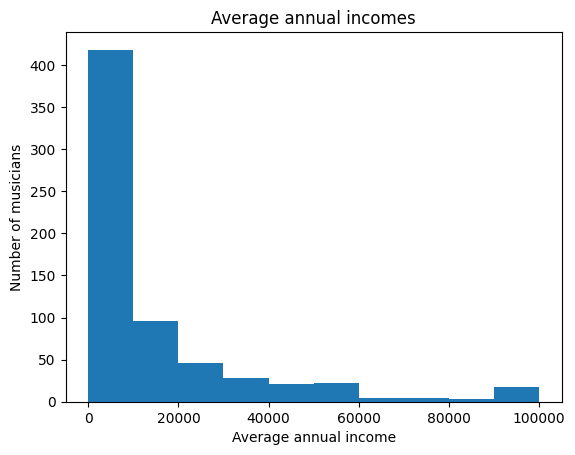

In [52]:
plt.hist(y)
plt.ylabel('Number of musicians')
plt.xlabel('Average annual income')
plt.title('Average annual incomes')
plt.show()

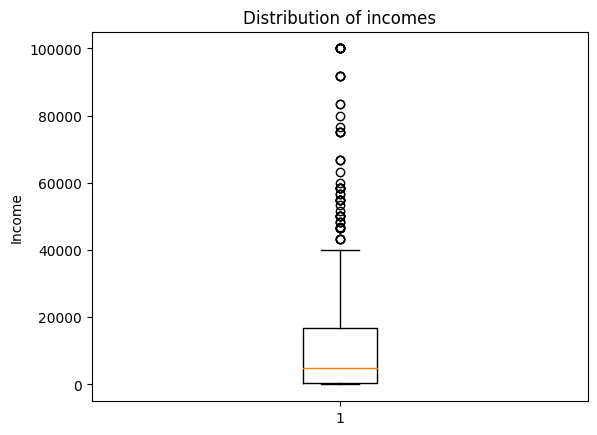

In [53]:
plt.boxplot(y)
plt.ylabel('Income')
plt.title('Distribution of incomes')
plt.show()

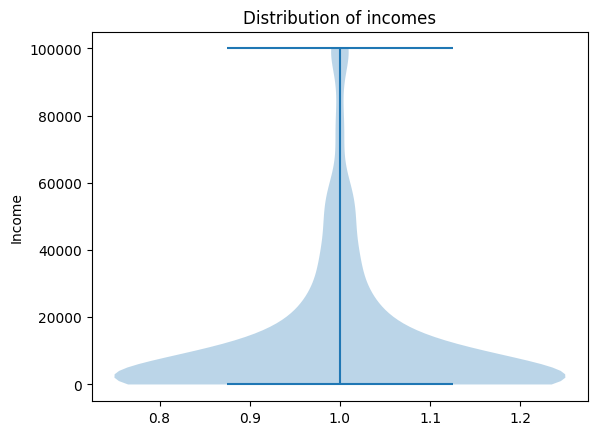

In [54]:
plt.violinplot(y)
plt.ylabel('Income')
plt.title('Distribution of incomes')
plt.show()

{'bodies': [<matplotlib.collections.PolyCollection at 0x7fe972d83400>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x7fe9750dffa0>,
 'cmins': <matplotlib.collections.LineCollection at 0x7fe972d839d0>,
 'cbars': <matplotlib.collections.LineCollection at 0x7fe972d83d30>}

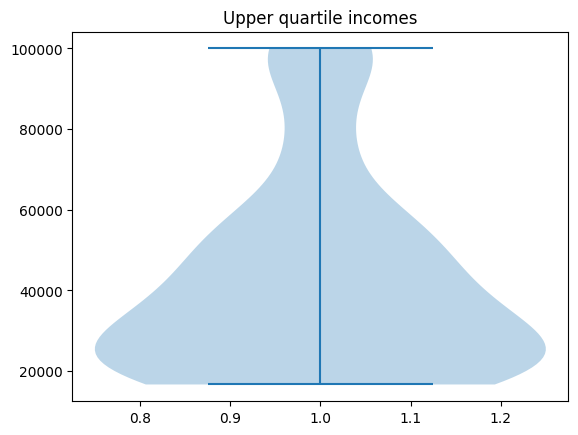

In [55]:
upper_q = df_musicians_target_averaged['Average annual income'].quantile(0.75)
upper_quartile_earners = [x for x in average_annual_income if x>upper_q]
plt.title('Upper quartile incomes')
plt.violinplot(upper_quartile_earners)

In [56]:
high_earners = [x for x in average_annual_income if x>=60000]
low_earners = [x for x in average_annual_income if x<=25000]

print(f'Number of musicians earning below £25,000: {len(low_earners)}')
print(f'Low earners as a percentage of the total number: {round((len(low_earners)/662)*100)}%')
print('')
print(f'Number of musicians earning above £60,000: {len(high_earners)}')
print(f'High earners as a percentage of the total number: {round((len(high_earners)/662)*100)}%')


print('')
print(f'Upper quartile: £{upper_q}')

Number of musicians earning below £25,000: 544
Low earners as a percentage of the total number: 82%

Number of musicians earning above £60,000: 31
High earners as a percentage of the total number: 5%

Upper quartile: £16667.75


<div style="background-color:Bisque;
            font-size:100%;
            font-family:Verdana;
            color:black;
            padding:20px;
            border-radius:5px;">
The earnings given are low-end estimates, as the lowest of the range values was taken from the original income columns. There can be no accurate estimate of earnings above £100,000 per year, as the category was simply given as being any amount above £100,000. Therefore some high earners may be earning more than this.

Evidently the median annual earnings is somewhere around £8,000, with most musicians, some 400+ out of our total of 662 earning between £0 - £20,000, which would not be enough to live on.

The upper quartile is £16,668 (75% of all musicians earn less than this), though this may not be including everything above £40,000 as these are detected as outliers due to the high density of very low incomes. The violinplot clearly shows this density.

There does seem to be a jump from earning less that £60,000, to then earning £100,000+, with very few values in the middle.


## Feature and target correlations

First I'll explore the creatortype variables to see what correlation there is with income

How many of each creatortype are present in the dataset?

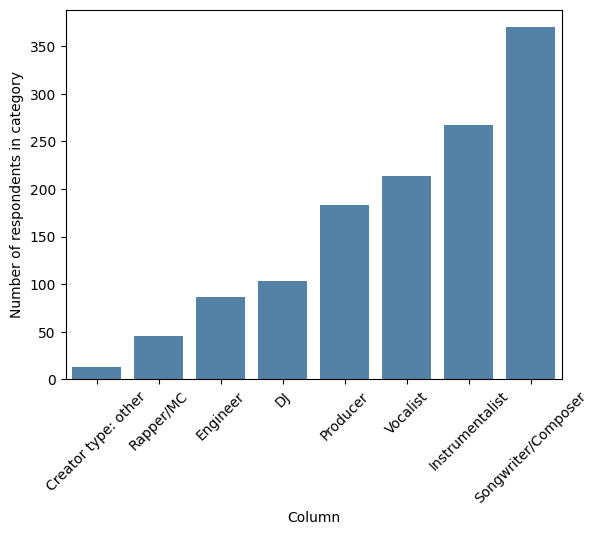

                Column  Total
0             Engineer     86
1            Rapper/MC     45
2                   DJ    103
3             Producer    183
4      Instrumentalist    267
5             Vocalist    214
6  Songwriter/Composer    370
7  Creator type: other     13


In [57]:
import seaborn as sns

value_totals = []
value_titles = []

for column in df_musicians_target_averaged.iloc[:,0:8]:
    value_titles.append(f'{column}')
    value_totals.append(df_musicians_target_averaged[column].sum())

df_value_totals = pd.DataFrame({'Column':[], 'Total':[]})
df_value_totals['Column'] = value_titles
df_value_totals['Total'] = value_totals

chart = sns.barplot(data=df_value_totals.sort_values(['Total']), x='Column', y='Total', width=0.8, color='steelblue')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
chart.set_ylabel('Number of respondents in category')
plt.show(chart)

print(df_value_totals)

In [58]:
#For every column that has a 1 value, add the income to the total for that category
#Do this for all categories
#Divide each income figure by the number of true values in the corresponding category
#Chart the average incomes of each category        

column_names = []
total_income = ()
average_income = []

for column in df_musicians_target_averaged.iloc[:,0:8]:
    column_names.append(f'{column}')
    total_income = sum(df_musicians_target_averaged['Average annual income'][df_musicians_target_averaged[column]==1])
    average_income.append(round(total_income/df_musicians_target_averaged[column].sum()))

df_income_by_creatortype = pd.DataFrame({
    'Creator type': column_names,
    'Average income': average_income
})


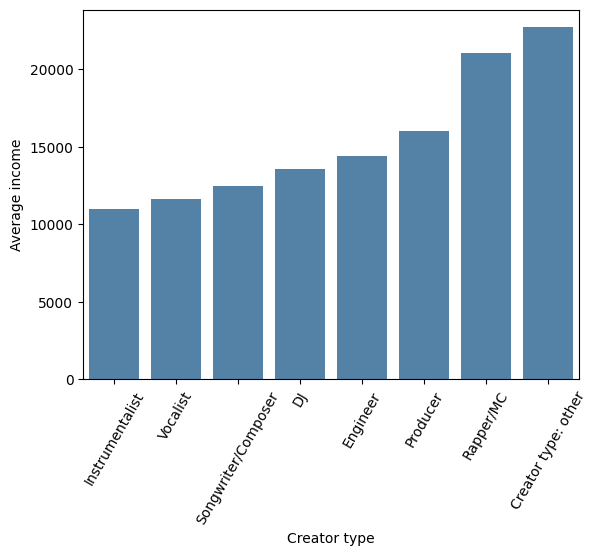

In [59]:
df_income_by_creatortype_sorted = df_income_by_creatortype.sort_values(['Average income'])


chart = sns.barplot(data=df_income_by_creatortype_sorted, x='Creator type', y='Average income', color='steelblue')

chart.set_xticklabels(chart.get_xticklabels(), rotation=60)
plt.show(chart)

In [60]:
other_respondents = df_musicians_target_averaged['Creator type: other'].sum()
print(f'Number of respondents in Other category: {other_respondents}')

Number of respondents in Other category: 13


<div style="background-color:Bisque;
            font-size:100%;
            font-family:Verdana;
            color:black;
            padding:20px;
            border-radius:5px;">
There is some relationship between creatortype and income, with Rapper/MC respondents evidently earning the best out of all known categories, and 'other' being the highest of all. However, there are very few 'Other' respondents so this could be skewed by just a few high values.

**I'd like to see those bar charts side-by-side, so it's easier to see how number of respondents in any given category matches with average incomes by category**

I'm interested next in how much music contributes to income, and how that affects income

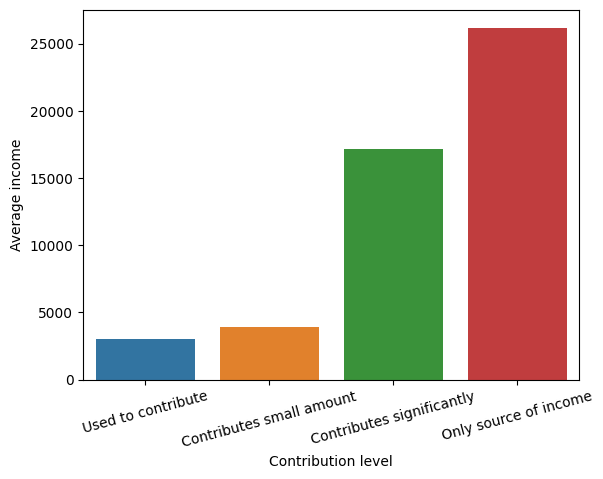

In [61]:
df_musicians_target_averaged['How much does music contribute to your income?'].nunique()


used_to_contribute = []
contributes_small_amount = []
contributes_significantly = []
only_source = []

for row in df_musicians_target_averaged.index:
    if df_musicians_target_averaged['How much does music contribute to your income?'].iloc[row] == 'Music used to contribute to my income but doesn\'t at the moment':
        used_to_contribute.append(df_musicians_target_averaged['Average annual income'].iloc[row])
    elif df_musicians_target_averaged['How much does music contribute to your income?'].iloc[row] == 'Music contributes a small amount to my income - I mostly rely on other forms of employment/income':
        contributes_small_amount.append(df_musicians_target_averaged['Average annual income'].iloc[row])
    elif df_musicians_target_averaged['How much does music contribute to your income?'].iloc[row] == 'Music contributes significantly to my income alongside other forms of employment/income':
        contributes_significantly.append(df_musicians_target_averaged['Average annual income'].iloc[row])
    elif df_musicians_target_averaged['How much does music contribute to your income?'].iloc[row] == 'Music is my only source of income':
        only_source.append(df_musicians_target_averaged['Average annual income'].iloc[row])

sum(used_to_contribute)/len(used_to_contribute)
sum(contributes_small_amount)/len(contributes_small_amount)
sum(contributes_significantly)/len(contributes_significantly)
sum(only_source)/len(only_source)

averages_by_category = {
    'Used to contribute': sum(used_to_contribute)/len(used_to_contribute),
    'Contributes small amount': sum(contributes_small_amount)/len(contributes_small_amount),
    'Contributes significantly': sum(contributes_significantly)/len(contributes_significantly),
    'Only source of income': sum(only_source)/len(only_source)
}

df_averages_by_category = pd.DataFrame(averages_by_category.items(), columns=['Contribution level','Average income'])

chart = sns.barplot(data=df_averages_by_category, x='Contribution level', y='Average income')
chart.set_xticklabels(chart.get_xticklabels(), rotation=15)
plt.show(chart)

In [62]:
print(f'Answered used to contribute: {len(used_to_contribute)}')
print(f'Answered contributes a small amount: {len(contributes_small_amount)}')
print(f'Answered contributes significantly: {len(contributes_significantly)}')
print(f'Answered music is my sole income: {len(only_source)}')

Answered used to contribute: 104
Answered contributes a small amount: 199
Answered contributes significantly: 171
Answered music is my sole income: 188


<div style="background-color:Bisque;
            font-size:100%;
            font-family:Verdana;
            color:black;
            padding:20px;
            border-radius:5px;">
<p>This is a stronger correlation, suggesting that musicians who rely on music more heavily as a source of income tend to earn more money. The number in each category is also quite evenly distributed, so the averages are likely to be fairly robust and not easily skewed by few values.</p>

<p>This could easily be simply as a result of the fact that the musicians who earn more are able to more heavily rely on music than others, thereby self-selecting.</p>

Next, I will ask whether the collaboration variable tracks to income.

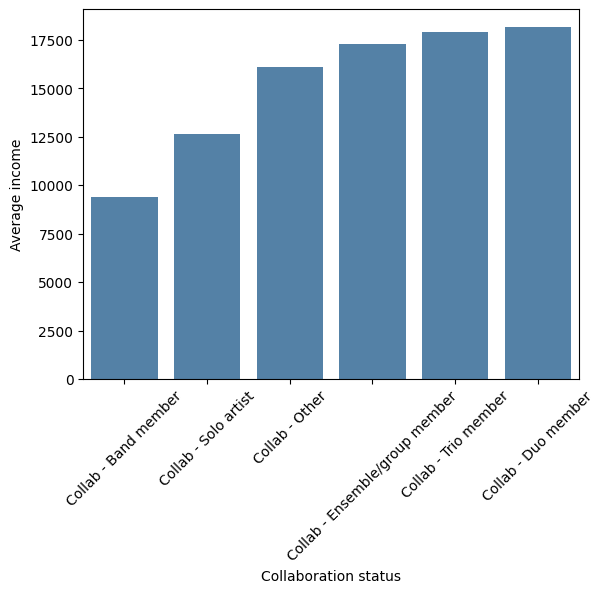

In [63]:
column_names = []
total_income = ()
average_income = []

for column in df_musicians_target_averaged.iloc[:,32:38]:
    column_names.append(f'{column}')
    total_income = sum(df_musicians_target_averaged['Average annual income'][df_musicians_target_averaged[column]==1])
    average_income.append(round(total_income/df_musicians_target_averaged[column].sum()))

df_income_by_collab = pd.DataFrame({
    'Collaboration status': column_names,
    'Average income': average_income
})

df_income_by_collab_sorted = df_income_by_collab.sort_values('Average income')

chart = sns.barplot(data=df_income_by_collab_sorted, x='Collaboration status', y='Average income', color='steelblue')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show(chart)

<div style="background-color:Bisque;
            font-size:100%;
            font-family:Verdana;
            color:black;
            padding:20px;
            border-radius:5px;">
 Evidently, band member has the poorest outlook, whilst the top four categories have little difference between them, scoring roughly double that of band members on average. Solo artist is towards the middle of the average.

Next, I ask whether the amount of time spent working on music correlates with income. It would be most interesting if it did not, otherwise it may simply be a self-selection, as in the case of income reliance and total income.

However, it would at least suggest that, in general, a musician who spends a lot of time on music tends to earn more.

In [64]:
df_musicians_target_averaged['Percentage of working time spent on music in 2019']

0                                  30%
1                                  20%
2                                  40%
3                                  70%
4                                  60%
                    ...               
657                                20%
658                                50%
659    100% (i.e. all of my work time)
660                                30%
661                                30%
Name: Percentage of working time spent on music in 2019, Length: 662, dtype: object

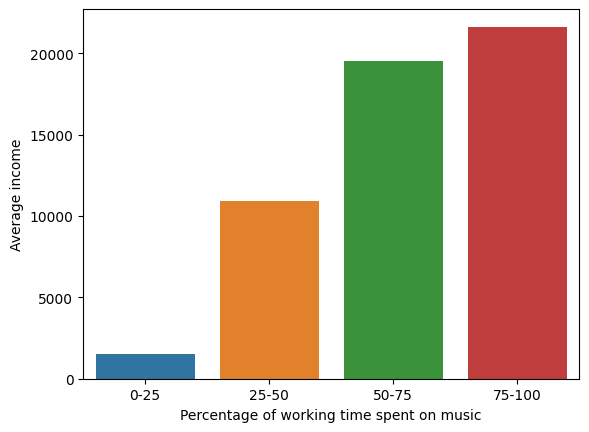

In [65]:
percentage_list = []
new_value = ()

for value in df_musicians_target_averaged['Percentage of working time spent on music in 2019']:
    value = value.replace(' (i.e. all of my work time)','')
    value = value.replace('Prefer not to say','')
    value = value.replace('%','')
    percentage_list.append(value)

percentage_series = pd.Series(percentage_list)
    
percentage_series = percentage_series.apply(pd.to_numeric, errors='coerce')

zero_to_twentyfive = []
twentyfive_to_fifty = []
fifty_to_seventyfive = []
seventyfive_to_hundred = []

for row in percentage_series.index:
    if percentage_series.iloc[row]<25:
        zero_to_twentyfive.append(df_musicians_target_averaged['Average annual income'].iloc[row])
    if 25<percentage_series.iloc[row]<50:
        twentyfive_to_fifty.append(df_musicians_target_averaged['Average annual income'].iloc[row])
    if 50<percentage_series.iloc[row]<75:
        fifty_to_seventyfive.append(df_musicians_target_averaged['Average annual income'].iloc[row])
    if 75<percentage_series.iloc[row]<=100:
        seventyfive_to_hundred.append(df_musicians_target_averaged['Average annual income'].iloc[row])

averages = []
        
averages.append(sum(zero_to_twentyfive)/len(zero_to_twentyfive))
averages.append(sum(twentyfive_to_fifty)/len(twentyfive_to_fifty))
averages.append(sum(fifty_to_seventyfive)/len(fifty_to_seventyfive))
averages.append(sum(seventyfive_to_hundred)/len(seventyfive_to_hundred))

df_music_time_vs_income_binned = pd.DataFrame({
                                        'Percentage of working time spent on music':['0-25','25-50', '50-75', '75-100'],
                                        'Average income':averages, 
                                        
                                       })

chart = sns.barplot(data=df_music_time_vs_income_binned, x='Percentage of working time spent on music', y='Average income')
chart.set_xticklabels(chart.get_xticklabels())
plt.show(chart)

In [66]:
df_music_time_vs_income = pd.DataFrame({
                                        'Percentage of working time spent on music':percentage_series,
                                        'Average income':df_musicians_target_averaged['Average annual income'], 
                                       })
df_music_time_vs_income.corr()

,Percentage of working time spent on music,Average income
Percentage of working time spent on music,1.000000,0.367388
Average income,0.367388,1.000000


In [67]:
import plotly.graph_objects as go
fig = go.Figure()
for x in np.arange(0, 101, 10):
    fig.add_trace(go.Box(y=df_music_time_vs_income['Average income'][df_music_time_vs_income['Percentage of working time spent on music']==x], name=f'{x} percent time spent'))

fig.update_xaxes(title_text="Average incomes by amount of working time spent on music")
fig.update_layout(title='Income according to percentage of working time spent on music')
fig.show()

# Model selection and training

<div style="background-color:LightSlateGray;
            font-size:105%;
            font-family:Verdana;
            color:white;
            padding:20px;
            border-radius:5px;">

<h4 style="font-size:115%;
    font-family:Verdana;
    color:white">The objective:</h4>

I can now train some regression models to establish a baseline performance from which to iterate further models. In particular, due to the way the dataframe was initially formatted, feature-engineering it will likely be fairly time-consuming, so a guide on how much more to do is important for efficiency going forward.
    
<h4 style="font-size:115%;
    font-family:Verdana;
    color:white">Summary of actions:</h4>
<ul>
    <li> Trained a linear regression model</li>
    <li> Trained a polynomial regression model</li>
    <li> Trained a SVR model</li>
    <li> Compared the RMS errors, distributions and ranges of values of each <\li>

</div>

In [68]:
numeric_columns = df_musicians_target_averaged.select_dtypes(include=['number'])
non_numeric_columns = df_musicians_target_averaged.select_dtypes(include=['object'])

print(non_numeric_columns.columns)

Index(['And which would you consider to be your main focus? - Selected Choice',
       'How much does music contribute to your income?', 'What is your age?',
       'In which part of the UK are you currently living?',
       'When working on songwriting or composing, do you usually work alone or with others?',
       'Do you usually write or compose music for yourself or others?',
       'Roughly what year did you start your music career?',
       'Percentage of working time spent on music in 2019',
       'Amount of time spent on music in 2019 compared to other years',
       '2019 income source percentage - Live performances',
       '2019 income source percentage - Audio streaming royalties',
       '2019 income source percentage - Video streaming royalties',
       '2019 income source percentage - Other online revenue (e.g. ads/promo etc.)',
       '2019 income source percentage - Digital sales (e.g. downloads)',
       '2019 income source percentage - Physical sales (e.g. CD and v

In [69]:
#That's tricky given the number of non-numeric columns that I'd need to sort out.
#Can I do some simple numeric conversion, and then try?

In [70]:
for col in df_musicians_target_averaged.columns:
    if df_musicians_target_averaged[col].isnull().sum()>0:
        print(col, df_musicians_target_averaged[col].isnull().sum())

And which would you consider to be your main focus? - Selected Choice 388
When working on songwriting or composing, do you usually work alone or with others? 206
Do you usually write or compose music for yourself or others? 206
How has your overall income from music changed since the growth of music streaming? 223
Before the growth of music streaming (2015), roughly how much did you earn from music in an average year? 223
Which statement best describes you in terms of the money spent vs. made on your music career in 2019? 4
Money spent vs money made on music pre-2015 118
How are the recordings that you have performed on or written usually released? 281
Main royalty rate 491
What kind of music publishing company have you been signed to? 363
And approximately how many tracks that you have been involved in creating are available via streaming services? 59
How important is streaming in terms of getting your music to audiences? 59
How important is streaming in relation to... - Money earned 

In [71]:
df_musicians_target_numeric = df_musicians_target_averaged.apply(pd.to_numeric, errors='ignore')

df_musicians_target_numeric.info()
    
#numeric_df = pd.to_numeric(df_musicians_target_averaged, errors='ignore')
#numeric_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Columns: 132 entries, Engineer to Average annual income
dtypes: bool(51), float64(25), int64(25), object(31)
memory usage: 452.0+ KB


In [72]:
'''
numeric_columns = df_musicians_target_numeric.select_dtypes(include=['number'])
non_numeric_columns = df_musicians_target_numeric.select_dtypes(include=['object'])

df_musicians_target_cheapnumeric = numeric_columns
df_musicians_target_cheapnumeric['Main royalty rate'].fillna(0, inplace=True)

len(df_musicians_target_cheapnumeric.columns)
len(non_numeric_columns.columns)


print(f'Proportion of columns retained in the cheapnumeric dataset: {len(df_musicians_target_cheapnumeric.columns)/len(df_musicians_target_averaged.columns)}')
'''

"\nnumeric_columns = df_musicians_target_numeric.select_dtypes(include=['number'])\nnon_numeric_columns = df_musicians_target_numeric.select_dtypes(include=['object'])\n\ndf_musicians_target_cheapnumeric = numeric_columns\ndf_musicians_target_cheapnumeric['Main royalty rate'].fillna(0, inplace=True)\n\nlen(df_musicians_target_cheapnumeric.columns)\nlen(non_numeric_columns.columns)\n\n\nprint(f'Proportion of columns retained in the cheapnumeric dataset: {len(df_musicians_target_cheapnumeric.columns)/len(df_musicians_target_averaged.columns)}')\n"

In [73]:
df_musicians_target_cheapnumeric = pd.read_csv('/kaggle/input/numeric-and-non-numeric-columns/df_musicians_target_cheapnumeric.csv')
non_numeric_columns = pd.read_csv('/kaggle/input/numeric-and-non-numeric-columns/non_numeric_columns.csv')

len(df_musicians_target_cheapnumeric.columns)
len(non_numeric_columns.columns)


print(f'Proportion of columns retained in the cheapnumeric dataset: {len(df_musicians_target_cheapnumeric.columns)/len(df_musicians_target_averaged.columns)}')

Proportion of columns retained in the cheapnumeric dataset: 0.7651515151515151


In [74]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)

In [75]:
X,y = df_musicians_target_cheapnumeric.drop(['Average annual income'], axis=1),df_musicians_target_averaged['Average annual income']

In [76]:
X_pca = pca.fit_transform(X)

In [77]:
print(pca.explained_variance_ratio_)

[0.23267622 0.13276163 0.07714026 0.06951619 0.06013762 0.0320075
 0.02927422 0.02745698 0.02644393 0.02238169 0.02186762 0.01983122
 0.01942642 0.01807891 0.01626238 0.01490515 0.01439024 0.01382147
 0.01307634 0.01282469]


In [78]:
#PCA seems to show just five principal components account for >6% of the explained variance each

In [79]:
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X)

In [80]:
print(pca.explained_variance_ratio_)

[0.23267622 0.13276163 0.07714026 0.06951619 0.06013762]


The PCA shows that I may have a lot of noisy data that doesn't particularly correlate to the target variable. This may be a problem going forward.

In [81]:
'''
This was to check after an error was thrown that my columns were inconsistent lengths. The solution was to reset the index.

for column in df_musicians_target_cheapnumeric.columns:
    print(len(df_musicians_target_cheapnumeric[column]))'''

'\nThis was to check after an error was thrown that my columns were inconsistent lengths. The solution was to reset the index.\n\nfor column in df_musicians_target_cheapnumeric.columns:\n    print(len(df_musicians_target_cheapnumeric[column]))'

In [82]:
#I'll try a baseline linear regression model before anything else

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lr_model = LinearRegression()

X,y = df_musicians_target_cheapnumeric.drop('Average annual income', axis=1),df_musicians_target_cheapnumeric['Average annual income']

scaler=StandardScaler()

X_scaled = scaler.fit_transform(X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.2)

lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [83]:
from sklearn.metrics import mean_squared_error
lr_prediction_test = lr_model.predict(X_test_scaled)
print(f'Root mean squared error: {mean_squared_error(y_test, lr_prediction_test, squared=False)}')

Root mean squared error: 19648.269449465915


In [84]:
lr_test_outputs = pd.DataFrame()
lr_test_outputs['True values'] = y_test
lr_test_outputs['Predicted values'] = lr_prediction_test

value_difference = []

lr_test_outputs.index = range(len(lr_test_outputs.index))

for row in lr_test_outputs.index:
    value_difference.append(abs(lr_test_outputs['Predicted values'].iloc[row]-lr_test_outputs['True values'].iloc[row]))

lr_test_outputs['Difference'] = value_difference
    
print(lr_test_outputs)


     True values  Predicted values   Difference
0         2334.0       12331.25899   9997.25899
1        23334.0       33179.25899   9845.25899
2        40001.0        5931.25899  34069.74101
3         2334.0       10031.25899   7697.25899
4        26668.0       28651.25899   1983.25899
..           ...               ...          ...
128       6668.0       23323.25899  16655.25899
129       2001.0       10651.25899   8650.25899
130      13334.0        2275.25899  11058.74101
131      23334.0       17179.25899   6154.74101
132          0.0      -11012.74101  11012.74101

[133 rows x 3 columns]


Clearly the model is performing poorly with a high MSE.

However, MSE would be high given that the numbers in the target variable are quite large, so the MSE will quickly run away.  
Root Mean Squared Error might be more useful in this case. I will rerun with RMSE.

In [85]:
from sklearn.metrics import mean_squared_error
lr_prediction_test = lr_model.predict(X_test_scaled)

LR_RMSE = mean_squared_error(y_test, lr_prediction_test, squared=False) 
LR_max_predicted_value = max(lr_prediction_test)

print('Model performance on test data')
print(f'Root mean squared error: £{mean_squared_error(y_test, lr_prediction_test, squared=False)}')
print(f'Max value predicted by model: £{max(lr_prediction_test)}')

Model performance on test data
Root mean squared error: £19648.269449465915
Max value predicted by model: £57771.25899018008


In [86]:
from sklearn.metrics import mean_squared_error
lr_train_test = lr_model.predict(X_train_scaled)
print('Model performance on training data')
print(f'Root mean squared error: £{mean_squared_error(y_train, lr_train_test, squared=False)}')
print(f'Max value predicted by model: £{max(lr_train_test)}')

Model performance on training data
Root mean squared error: £16318.110936300707
Max value predicted by model: £76907.25899018008


The RMSE is clearer.  
I don't see evidence of overfitting from these scores.  


Does it perform just as well on high and low incomes?

I could try a polynomial regression to improve predictions if it gets worse at higher incomes.  

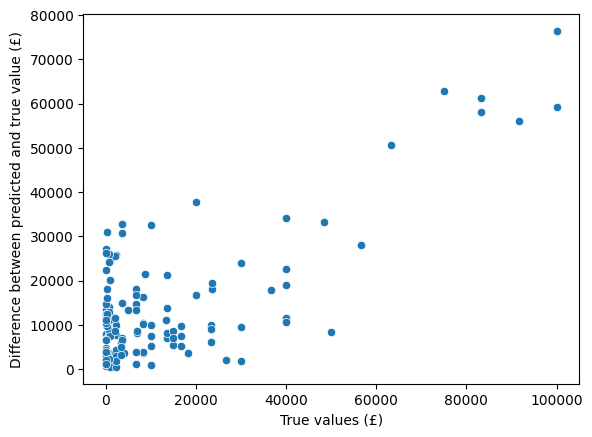

In [87]:
x_plot = lr_test_outputs['True values']
y_plot = lr_test_outputs['Difference']

sns.scatterplot(x=x_plot, y=y_plot)
plt.ylabel("Difference between predicted and true value (£)")
plt.xlabel("True values (£)")
plt.show()

In [88]:
lr_test_outputs.corr()

,True values,Predicted values,Difference
True values,1.000000,0.422346,0.748585
Predicted values,0.422346,1.000000,0.504718
Difference,0.748585,0.504718,1.000000


Evidently, as the true value increases, the difference between the predicted and the actual value increases. This may be simply a factor of the model making roughly the same degree of error, but amplified because of the higher value.

Performance seems poor at all scales, with the model essentially never correctly predicting high values and predicting low values poorly.

In [89]:
pd.set_option('display.max_rows',500)
#lr_test_outputs

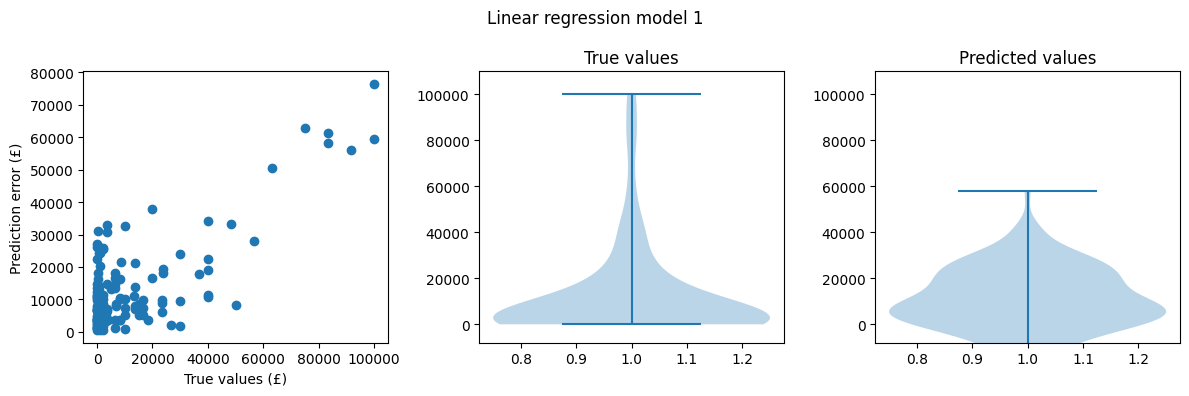

In [90]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(12,4))

x_plot = lr_test_outputs['True values']
y_plot = lr_test_outputs['Difference']

axes[0].scatter(x=x_plot, y=y_plot)
axes[0].set_ylabel("Prediction error (£)")
axes[0].set_xlabel("True values (£)")

axes[1].violinplot(lr_test_outputs['True values'])
axes[1].set_title("True values")
axes[1].set_ylim(-8000,110000)

axes[2].set_title("Predicted values")
axes[2].violinplot(lr_test_outputs['Predicted values'])
axes[2].set_ylim(-8000,110000)

plt.suptitle('Linear regression model 1')
plt.tight_layout()


The above shows that the model is overestimating the number of values in the middle income range, and never predicting any above £60,000.

It predicts negative incomes, which is clearly an error.



In [91]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2, include_bias=False)
pr_model = LinearRegression()
poly_X_scaled = poly.fit_transform(X_scaled)

X_train_poly, X_test_poly, y_train, y_test = train_test_split(poly_X_scaled, y, random_state=42, test_size=0.2)

pr_model.fit(X_train_poly, y_train)

LinearRegression()

In [92]:
from sklearn.metrics import mean_squared_error
pr_train_outputs = pr_model.predict(X_train_poly)
PR_training_RMSE = mean_squared_error(y_train, pr_train_outputs, squared=False)
print('Model performance on training data')
print(f'Polynomial regression RMSE on training dataset: {PR_training_RMSE:.10f}')
print(f'Max value predicted by model: £{max(pr_train_outputs)}')

Model performance on training data
Polynomial regression RMSE on training dataset: 0.0000000001
Max value predicted by model: £100000.0000000003


In [93]:
from sklearn.metrics import mean_squared_error
pr_test_outputs = pr_model.predict(X_test_poly)

PR_RMSE = mean_squared_error(y_test, pr_test_outputs, squared=False)
PR_max_predicted_value = max(pr_test_outputs)

print('Model performance on test data')
print(f'Polynomial regression RMSE on test dataset: £{PR_RMSE:.10f}')
print(f'Max value predicted by model: £{max(pr_test_outputs)}')

Model performance on test data
Polynomial regression RMSE on test dataset: £19858.2176502386
Max value predicted by model: £47262.961662888105


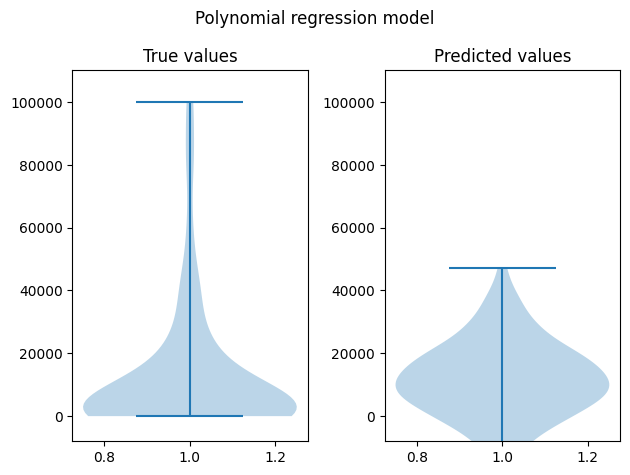

In [94]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.set_title("True values")
ax1.violinplot(y_test)
ax1.set_ylim(-8000,110000)

ax2.set_title("Predicted values")
ax2.violinplot(pr_test_outputs)
ax2.set_ylim(-8000,110000)

fig.suptitle('Polynomial regression model')

fig.tight_layout()

plt.show()

fig_lrmodel1 = fig


This now performs almost perfectly on the test data, and more poorly than before on the test data. Presumably this is an overfitting problem, perhaps due to the high number of features.

The model improves on the linear regression model in predicting fewer middle incomes.

It still predicts negative values.

Currently, these models are not performing well enough to be at all predictive. I will test an alternative baseline model.

### Baseline model alternative: Support Vector Regression

In [95]:
import sklearn
from sklearn.svm import SVR

svc_model = SVR(kernel='rbf',C=50000)
svc_model.fit(X_train_scaled, y_train)

SVR(C=50000)

In [96]:
SVM_test_outputs = svc_model.predict(X_test_scaled)
print('Model performance on test data')
print(f'SVM root mean squared error: £{mean_squared_error(y_test, SVM_test_outputs, squared=False)}')

Model performance on test data
SVM root mean squared error: £19391.380762104625


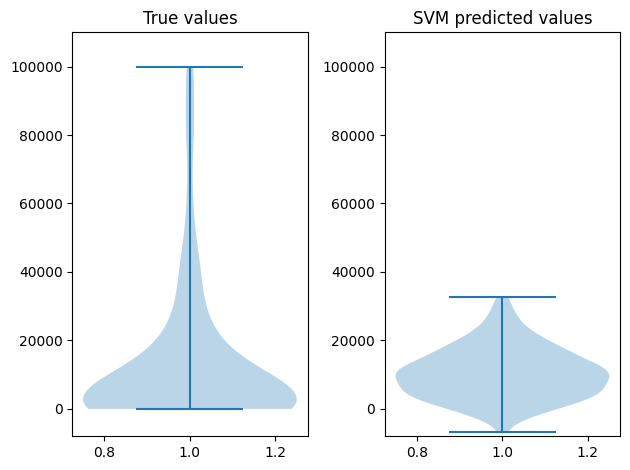

In [97]:
plt.subplot(1,2,2)
plt.title('SVM predicted values')
plt.ylim(-8000,110000)
plt.violinplot(SVM_test_outputs)

plt.subplot(1,2,1)
plt.title('True values')
plt.ylim(-8000,110000)
plt.violinplot(y_test)

plt.tight_layout()
plt.show()


In [98]:
import math

df_SVM_test_outputs = pd.DataFrame()

df_SVM_test_outputs['True y'] = y_test
#works
df_SVM_test_outputs['Predicted values'] = SVM_test_outputs

value_difference = []

df_SVM_test_outputs.index = range(len(df_SVM_test_outputs.index))

for row in df_SVM_test_outputs.index:
    value_difference.append(abs(df_SVM_test_outputs['Predicted values'].iloc[row]-df_SVM_test_outputs['True y'].iloc[row]))

df_SVM_test_outputs['Difference'] = value_difference

SVM_max_predicted_value = max(df_SVM_test_outputs['Predicted values'])
SVM_RMSE = math.sqrt(mean_squared_error(y_test, SVM_test_outputs))

print(f'Max value predicted by model: £{SVM_max_predicted_value}')
print(f'SVM root mean squared error: £{SVM_RMSE}')

#SVM_test_outputs

Max value predicted by model: £32589.212214825046
SVM root mean squared error: £19391.380762104625


### Summary of all model performance

In [99]:
model_results = {'Model RMSE scores':[LR_RMSE, PR_RMSE, SVM_RMSE],
                    'Model max values predicted':[LR_max_predicted_value, PR_max_predicted_value, SVM_max_predicted_value]
                   }

df_model_results = pd.DataFrame(model_results, index=['Linear Regression','Polynomial Regression','Support Vector Regression'])
display(df_model_results)
print(f'Polynomial Regression Training data RMSE: £{PR_training_RMSE:.10f}')

,Model RMSE scores,Model max values predicted
Linear Regression,19648.269449,57771.258990
Polynomial Regression,19858.217650,47262.961663
Support Vector Regression,19391.380762,32589.212215


Polynomial Regression Training data RMSE: £0.0000000001


<div style="background-color:Bisque;
            font-size:100%;
            font-family:Verdana;
            color:black;
            padding:20px;
            border-radius:5px;">

<p>Models scored roughly equally on RMSE scores on test data. The Linear Regression model was better in that it did predict some higher incomes, though it still fails to predict incomes up to the level seen in the actual
        test data, where £100,000 is the maxiumum. The other models tend to more greatly underestimate incomes.</p>

<p>The Polynomial Regression model seems to suffer greatly from overfitting, evidenced by the almost perfect RMSE score on the training data.</p>

# Summary of baseline machine learning models and next steps

<div style="background-color:Bisque;
            font-size:105%;
            font-family:Verdana;
            color:black;
            padding:20px;
            border-radius:5px;">

<p>The models have shown some success in predicting the broad shape of the data. However, the RMS errors are all equally high, and the maximums are all well below the real-world maximum incomes. Further, the error for predicting any given income grows as the income grows. The models are struggling to make accurate predictions of any specific income value.</p>
 
<p>The EDA carried out so far has been fairly limited, and the models were trained on the most readily avaible numeric data. More detailed EDA and feature-engineering may well lead to improved models. I will now focus on analysing specific features which may point to interesting relationships between a musician's activities and their income, with less concern for the ease of making the data ready for analysis.</p>
    
<p>Importantly, the analysis of income according to amount of working time spent on music points to potentially meaningful non-linear correlations within the data. Given this, and the difficulty that the regression models are having in predicting precise income values, I will reframe the problem as a classification problem, setting the threshold at roughly the UK living wage of £20,000 per year. I would argue that this is an important threshold, as it determines whether a musician can support themselves from music or not.</p>
    
<p>Having done this, I will train Random Forest models on the revised dataframe to learn non-linear relationships which may be present, and extract the feature-importances.

# EDA and further feature selection

<div style="background-color:LightSlateGray;
            font-size:105%;
            font-family:Verdana;
            color:white;
            padding:20px;
            border-radius:5px;">
    
<h4 style="font-size:115%;
    font-family:Verdana;
    color:white">The objective:</h4>
To further investigate the features available in the dataset, identify both linear and non-linear correlations, and engineer those features for training classification models.
    
<h4 style="font-size:115%;
    font-family:Verdana;
    color:white">Summary of actions:</h4>
<ul>
    <li>Used Pearson Correlations to narrow down the number of features and train an updated linear regression model</li>
    <li>Investigated features for correlations and graphed those features, selecting for features which point to levels of professionalism, including:</li>
    <li style="padding-left:20px;
               list-style-position: inside">Percentage of working time spent on music;</li>
        <li style="padding-left:40px;
               list-style-position: inside"><i>Compared the income distributions of the highest earning categories of working time spent on music;</i></li>
        <li style="padding-left:40px;
               list-style-position: inside"><i>Rated the earnings efficiency of respondents on a normalised scale, according to the percentage of working time spent on music</i></li>
    <li style="padding-left:20px;
               list-style-position: inside">Percentage of total income gained from music;</li>
    <li style="padding-left:20px;
               list-style-position: inside">Average incomes according to primary and secondary income sources;</li>
        <li style="padding-left:40px;
               list-style-position: inside"><i>Graphed each source vs average income;</i></li>
        <li style="padding-left:40px;
               list-style-position: inside"><i>Compared average incomes of those who list only primary incomes agains those who list both primary and secondary incomes;</i></li>
    <li style="padding-left:20px;
               list-style-position: inside">Number of social media followers across all plaforms;</li>
    <li style="padding-left:20px;
               list-style-position: inside">The year a respondent started their career.</li>
    
</div>

In [100]:
#Starting with a correlation matrix to identify most predictive candidates

corr_matrix = df_musicians_target_cheapnumeric.corr()
corr_matrix
print('Correlation matrices showing features most positively and most negatively correlated with income')
print('')
print(corr_matrix['Average annual income'][corr_matrix['Average annual income']>0.2])
print(corr_matrix['Average annual income'][corr_matrix['Average annual income']<-0.1])

Correlation matrices showing features most positively and most negatively correlated with income

Signed to major label                                                              0.316565
2019 income source percentage - Broadcast (e.g. radio and TV use of your music)    0.214008
pre-2015 income source percentage - Audio streaming royalties                      0.219483
pre-2015 income source percentage - Mechanical royalties                           0.214388
Average annual income                                                              1.000000
Name: Average annual income, dtype: float64
Self-release\DIY                                        -0.197041
Inactive years - 2000-2004                              -0.115902
Inactive years - 2005-09                                -0.106501
Inactive years - 2010-14                                -0.101356
Inactive years - 2015-21                                -0.149624
2019 income source percentage - Live performances       -0.180771
Ea

In [101]:
'''
Clearly, the most positive correlations are:
- Signed to a major label;
- Reliance on Broadcast usage income;
- Reliance on audio streaming royalties pre-2015;
- Reliance on mechanical streaming royalties pre-2015;

And the most negative are:
- Self-release as the main form of releasing music;
- Inactivity, with some leaning towards more recent inactivity being more negatively correlated;
- Reliance on live performance as a main source of income

Still, these are mainly fairly weak correlations even still, with the major label status being the highest at just 0.32

'''

'\nClearly, the most positive correlations are:\n- Signed to a major label;\n- Reliance on Broadcast usage income;\n- Reliance on audio streaming royalties pre-2015;\n- Reliance on mechanical streaming royalties pre-2015;\n\nAnd the most negative are:\n- Self-release as the main form of releasing music;\n- Inactivity, with some leaning towards more recent inactivity being more negatively correlated;\n- Reliance on live performance as a main source of income\n\nStill, these are mainly fairly weak correlations even still, with the major label status being the highest at just 0.32\n\n'

<div style="background-color:Bisque;
            font-size:100%;
            font-family:Verdana;
            color:black;
            padding:20px;
            border-radius:5px;">
There seem to be a small number of features in the dataset used to train the baseline models which show a reasonable level of correlation with income. I will train a new model using Pearson Correlations (SelectKBest in SKlearn) to see if the result is significantly improved.

In [102]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import r_regression, SelectKBest

X,y = df_musicians_target_cheapnumeric.drop('Average annual income', axis=1),df_musicians_target_cheapnumeric['Average annual income']
X_scaled = scaler.fit_transform(X)
X_selection = SelectKBest(r_regression, k=6).fit_transform(X_scaled, y)

lr_model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X_selection, y, random_state=42, test_size=0.2)

lr_model.fit(X_train, y_train)

LinearRegression()

In [103]:
from sklearn.metrics import mean_squared_error
lr_prediction_test = lr_model.predict(X_test)
print(f'Root mean squared error: {mean_squared_error(y_test, lr_prediction_test, squared=False)}')

Root mean squared error: 18825.375797783214


In [104]:
lr_test_outputs = pd.DataFrame()
lr_test_outputs['True values'] = y_test
lr_test_outputs['Predicted values'] = lr_prediction_test

value_difference = []

lr_test_outputs.index = range(len(lr_test_outputs.index))

for row in lr_test_outputs.index:
    value_difference.append(abs(lr_test_outputs['Predicted values'].iloc[row]-lr_test_outputs['True values'].iloc[row]))

lr_test_outputs['Difference'] = value_difference
    
#print(lr_test_outputs)

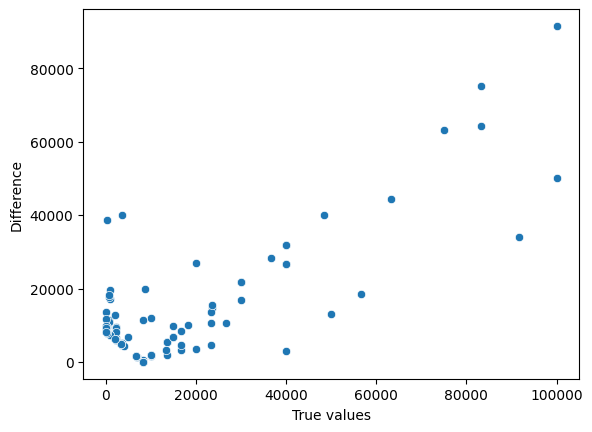

In [105]:
x_plot = lr_test_outputs['True values']
y_plot = lr_test_outputs['Difference']

sns.scatterplot(x=x_plot, y=y_plot)
plt.show()

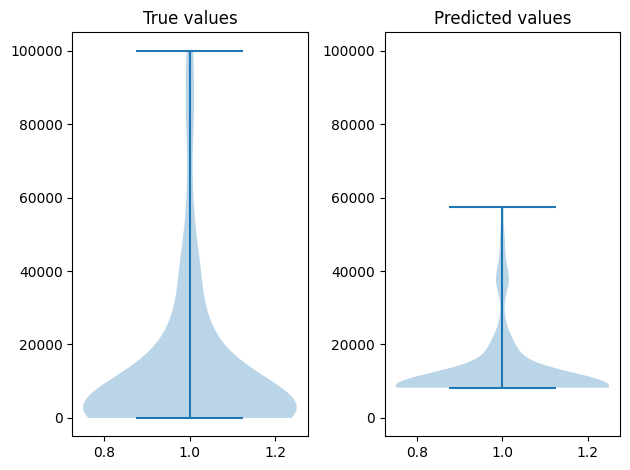

In [106]:
lr_model_plot = plt.subplot(1,2,1)
plt.title("True values")
plt.violinplot(lr_test_outputs['True values'])

plt.subplot(1,2,2)
plt.title("Predicted values")
plt.violinplot(lr_test_outputs['Predicted values'])
plt.ylim(-5000,105000)

plt.tight_layout()
plt.show(lr_model_plot)

<div style="background-color:Bisque;
            font-size:100%;
            font-family:Verdana;
            color:black;
            padding:20px;
            border-radius:5px;">
The result is improved - the RMS error is somewhat reduced. The shape of the data is modeled with more accuracy than the previous linear regression model. Given that this is achieved with only six out of all of the possible features, this is certainly more efficient.
A major limitation is that this will not detect non-linear relationships. Particularly given the analysis of time spent on music vs income, I suspect there may be important non-linear relationships in the data, which I will need to detect in order to train a more predictive model.

***

## What data did I exclude when extracting the numerical features, and does it offer any stronger correlations?

In [107]:
#what data did I miss, and does it potentially offer better predictive power?
print(non_numeric_columns.columns)

Index(['And which would you consider to be your main focus? - Selected Choice',
       'How much does music contribute to your income?', 'What is your age?',
       'In which part of the UK are you currently living?',
       'When working on songwriting or composing, do you usually work alone or with others?',
       'Do you usually write or compose music for yourself or others?',
       'Roughly what year did you start your music career?',
       'Percentage of working time spent on music in 2019',
       'Amount of time spent on music in 2019 compared to other years',
       'What percentage of your overall income did you earn from your music career in 2019?',
       'Earned money from music before 2015',
       'How has your overall income from music changed since the growth of music streaming?',
       'Before the growth of music streaming (2015), roughly how much did you earn from music in an average year?',
       'Which statement best describes you in terms of the money spent vs

I'll look at these remaining columns by filtering for professionalism, which I would define as spending most time on music,
and adopting streaming and social media as key parts of an income strategy.

Selecting columns:  
'Roughly what year did you start your career?'  
'How much does music contribute to your income?'  
'What percentage of your overall income did you earn from your music career in 2019?'  
'How important is streaming in terms of getting your music to audiences?'  
'And approximately how many tracks that you have been involved in creating are available via streaming services?'  
'Approximately how many followers do you have across all social media platforms (Facebook, Instagram, Twitter etc.) you are active on?'


In [108]:
non_numeric_columns['How much does music contribute to your income?'].value_counts()

How much does music contribute to your income?
Music contributes a small amount to my income - I mostly rely on other forms of employment/income    199
Music is my only source of income                                                                    188
Music contributes significantly to my income alongside other forms of employment/income              171
Music used to contribute to my income but doesn't at the moment                                      104
Name: count, dtype: int64

In [109]:
non_numeric_incomecontrib = non_numeric_columns['How much does music contribute to your income?']
non_numeric_incomecontrib_OH = pd.get_dummies(non_numeric_incomecontrib)
non_numeric_incomecontrib_OH['Average annual income'] = y
non_numeric_incomecontrib_OH
corr_matrix = non_numeric_incomecontrib_OH.corr()
corr_matrix['Average annual income']

Music contributes a small amount to my income - I mostly rely on other forms of employment/income   -0.293388
Music contributes significantly to my income alongside other forms of employment/income              0.099654
Music is my only source of income                                                                    0.371756
Music used to contribute to my income but doesn't at the moment                                     -0.210860
Average annual income                                                                                1.000000
Name: Average annual income, dtype: float64

<div style="background-color:Bisque;
            font-size:100%;
            font-family:Verdana;
            color:black;
            padding:20px;
            border-radius:5px;">
The above shows that reliance on music as a source of income correlates quite strongly to average income. This is not a surprise.

Next, I ask whether the percentage of income earned from music correlates significantly to the amount of income earned.

In [110]:
non_numeric_2019perc = non_numeric_columns['What percentage of your overall income did you earn from your music career in 2019?']
non_numeric_2019perc_OH = pd.get_dummies(non_numeric_2019perc)
non_numeric_2019perc_OH['Average annual income'] = y

corr_matrix = non_numeric_2019perc_OH.corr()
corr_matrix['Average annual income'].sort_values(ascending=False)

Average annual income                   1.000000
100% (i.e. all of my overall income)    0.322654
60%                                     0.195090
70%                                     0.085606
80%                                     0.063136
90%                                     0.059018
50%                                     0.029169
40%                                    -0.013900
Prefer not to say                      -0.039989
30%                                    -0.047234
20%                                    -0.093572
0%                                     -0.206969
10%                                    -0.295067
Name: Average annual income, dtype: float64

<div style="background-color:Bisque;
            font-size:100%;
            font-family:Verdana;
            color:black;
            padding:20px;
            border-radius:5px;">
This is more surprising. On the face of it, the finding that musicians who spend are most correlated with high incomes is not surprising, and may well be a self-selection. However, the numbers show that musicians spending 70%, 80% and 90% of their time on music are not seeing that correlate very strongly with higher incomes, with musicians spending 60% of their time on music seeing a stronger positive correlation with income than any of these categories.

In [111]:
#The formatting could be better for drawing correlations
#I'll instead replace the percentages with integer values so that I can plot the correlation on a chart
non_numeric_2019perc = non_numeric_columns['What percentage of your overall income did you earn from your music career in 2019?']
numeric_2019perc = non_numeric_2019perc.replace({
    '100% (i.e. all of my overall income)': int(100),
    '90%': int(90),
    '80%': int(80),
    '70%': int(70),
    '60%': int(60),
    '50%': int(50),
    '40%': int(40),
    '30%': int(30),
    '20%': int(20),
    '10%': int(10),
    '0%': int(0),
    'Prefer not to say': int(0)
}, inplace=True)

numeric_2019perc

In [112]:
df_numeric_2019perc = pd.DataFrame(non_numeric_2019perc)
df_numeric_2019perc['Average annual income'] = y
df_numeric_2019perc

,What percentage of your overall income did you earn from your music career in 2019?,Average annual income
0,0,1.0
1,20,334.0
2,40,3334.0
3,70,75001.0
4,60,40001.0
...,...,...
657,10,1.0
658,10,1001.0
659,100,76667.0
660,10,668.0


In [113]:
corr_matrix = df_numeric_2019perc.corr()
corr_matrix

,What percentage of your overall income did you earn from your music career in 2019?,Average annual income
What percentage of your overall income did you earn from your music career in 2019?,1.000000,0.473959
Average annual income,0.473959,1.000000


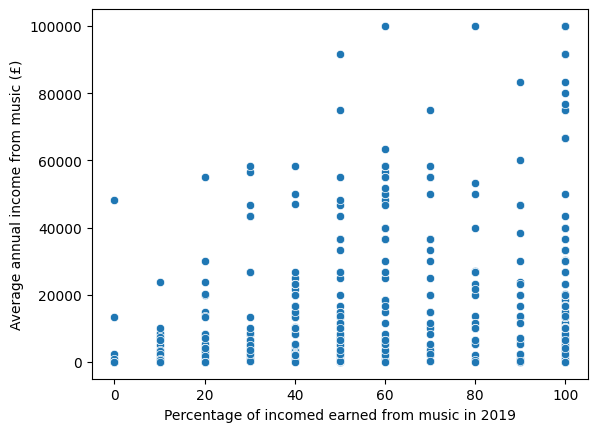

In [114]:
perc_vs_ave, ax = plt.subplots()
sns.scatterplot(x=df_numeric_2019perc['What percentage of your overall income did you earn from your music career in 2019?'], y=df_numeric_2019perc['Average annual income'], ax=ax)

ax.set_xlabel('Percentage of incomed earned from music in 2019')
ax.set_ylabel('Average annual income from music (£)')

plt.show()

In [115]:
fig = go.Figure()
for x in np.arange(0, 101, 10):
    fig.add_trace(go.Box(y=df_numeric_2019perc['Average annual income'][df_numeric_2019perc['What percentage of your overall income did you earn from your music career in 2019?']==x], boxpoints='all', name=f'{x} percent of income from music'))
fig.update_layout(title='Income according to reliance on music for income')
fig.show()

<div style="background-color:Bisque;
            font-size:100%;
            font-family:Verdana;
            color:black;
            padding:20px;
            border-radius:5px;">

This clearly shows the clustering of middle incomes for musicians in the 60% of income music category. It also more clearly shows the distribution of incomes for each percentage category, with those relying on music for 100% of their income showing a distribution clustering towards the £15-20k mark, and spreading more into the £20-40k bracket than most other categories, and with more high-earners than any other.  

This is potentially interesting. It seems to show that there are a proportion of successful musicians who earn 60% of their total income on music, whilst earning a viable living from other sources.

It would be interesting to see how much time those musicians spent on music, compared to other employment, to get a sense of how this balance might be functioning in practice.

I will break out this information and run summary statistics to see if there are any obvious patterns.

## Percentage of working time vs income

In [116]:
df_musicians_target_averaged['What percentage of your overall income did you earn from your music career in 2019?'].replace({
    '100% (i.e. all of my overall income)': int(100),
    '90%': int(90),
    '80%': int(80),
    '70%': int(70),
    '60%': int(60),
    '50%': int(50),
    '40%': int(40),
    '30%': int(30),
    '20%': int(20),
    '10%': int(10),
    '0%': int(0),
    'Prefer not to say': int(0)
}, inplace=True)

In [117]:
df_musicians_target_averaged['Percentage of working time spent on music in 2019'].replace({
    '100% (i.e. all of my work time)': int(100),
    '90%': int(90),
    '80%': int(80),
    '70%': int(70),
    '60%': int(60),
    '50%': int(50),
    '40%': int(40),
    '30%': int(30),
    '20%': int(20),
    '10%': int(10),
    '0%': int(0),
    'Prefer not to say': int(0)
}, inplace=True)

In [118]:
def perc_time_spent(x):
    return df_musicians_target_averaged['Percentage of working time spent on music in 2019'][df_musicians_target_averaged['What percentage of your overall income did you earn from your music career in 2019?']==x]

In [119]:
print('Time spent on music according to what percentage of the individual\'s income earned from music:')
percentages_list = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 0]

for x in percentages_list:
    print(f'{x}% of income from music:', round(perc_time_spent(x).mean()), '% of working time spent on music')

Time spent on music according to what percentage of the individual's income earned from music:
100% of income from music: 97 % of working time spent on music
90% of income from music: 84 % of working time spent on music
80% of income from music: 77 % of working time spent on music
70% of income from music: 70 % of working time spent on music
60% of income from music: 61 % of working time spent on music
50% of income from music: 54 % of working time spent on music
40% of income from music: 48 % of working time spent on music
30% of income from music: 45 % of working time spent on music
20% of income from music: 37 % of working time spent on music
10% of income from music: 28 % of working time spent on music
0% of income from music: 21 % of working time spent on music


In [120]:
mean_time_spent = []
average_income_by_perc_income = []

for x in percentages_list:
    mean_time_spent.append(perc_time_spent(x).mean())
    
mean_time_spent

[96.69172932330827,
 84.0,
 76.66666666666667,
 70.0,
 60.95238095238095,
 54.44444444444444,
 48.23529411764706,
 44.680851063829785,
 36.666666666666664,
 28.029197080291972,
 21.466666666666665]

In [121]:
def average_income_by_perc(x):
    return df_musicians_target_averaged['Average annual income'][df_musicians_target_averaged['What percentage of your overall income did you earn from your music career in 2019?']==x]

In [122]:
average_income_by_perc_income = []

for x in percentages_list:
    average_income_by_perc_income.append(average_income_by_perc(x).mean())
    
i = 0

for x in percentages_list:
    print(f'mean average income of those earning {x} % of income from music: £', average_income_by_perc_income[i])
    i+=1


mean average income of those earning 100 % of income from music: £ 27354.248120300752
mean average income of those earning 90 % of income from music: £ 19920.92
mean average income of those earning 80 % of income from music: £ 20514.916666666668
mean average income of those earning 70 % of income from music: £ 22115.896551724138
mean average income of those earning 60 % of income from music: £ 29635.904761904763
mean average income of those earning 50 % of income from music: £ 15618.25925925926
mean average income of those earning 40 % of income from music: £ 12478.117647058823
mean average income of those earning 30 % of income from music: £ 9837.829787234043
mean average income of those earning 20 % of income from music: £ 6060.155555555555
mean average income of those earning 10 % of income from music: £ 1088.5474452554745
mean average income of those earning 0 % of income from music: £ 893.96


In [123]:
#I now need a table with the index being titled as the percentage of income generated from music
df_income_time_percs = pd.DataFrame()

df_income_time_percs['Mean % of working time spent on music']=mean_time_spent
df_income_time_percs['Mean average income from music']=average_income_by_perc_income
df_income_time_percs.index = percentages_list

df_income_time_percs.index.name = '% of income from music'

#To calculate efficiency I now divide money earned by time spent earning it

df_income_time_percs['Money earned divided by percentage of time worked'] = df_income_time_percs['Mean average income from music']/df_income_time_percs['Mean % of working time spent on music']

#And I score the respondent categories for efficiency by scaling all scores against the most efficient category.

scaled_efficiency_scores = []

for x in df_income_time_percs['Money earned divided by percentage of time worked']:
    scaled_efficiency_scores.append(x/max(df_income_time_percs['Money earned divided by percentage of time worked']))

df_income_time_percs['Efficiency scores'] = scaled_efficiency_scores
df_income_time_percs

,Mean % of working time spent on music,Mean average income from music,Money earned divided by percentage of time worked,Efficiency scores
% of income from music,,,,
100,96.691729,27354.248120,282.901633,0.581846
90,84.000000,19920.920000,237.153810,0.487756
80,76.666667,20514.916667,267.585870,0.550346
70,70.000000,22115.896552,315.941379,0.649799
60,60.952381,29635.904762,486.214063,1.000000
50,54.444444,15618.259259,286.865986,0.589999
40,48.235294,12478.117647,258.692683,0.532055
30,44.680851,9837.829787,220.180000,0.452846
20,36.666667,6060.155556,165.276970,0.339926


In [124]:
#It might be informative to show spread of the data which may illustrate some of the difficulties for ML models
from scipy import stats

#Put the different times spent into categorical lists and then have a look at spread

perc_time_60 = df_musicians_target_averaged['Average annual income'][df_musicians_target_averaged['Percentage of working time spent on music in 2019']==60]
print('Interquartile range of incomes for those in the 60 of income from music category: £', stats.iqr(perc_time_60))
perc_time_60.sort_values(ascending=True, inplace=True)
#print(len(perc_time_60))
print('median income in 60% category: ', perc_time_60[25:26].values)

perc_time_100 = df_musicians_target_averaged['Average annual income'][df_musicians_target_averaged['Percentage of working time spent on music in 2019']==100]
print('Interquartile range of incomes for those in the 100 of income from music category: £', stats.iqr(perc_time_100))
perc_time_100.sort_values(ascending=True, inplace=True)
#print(len(perc_time_100)/2)
print('median income in 100% category: ', perc_time_100[round(len(perc_time_100)/2):round(len(perc_time_100)/2)+1].values)

Interquartile range of incomes for those in the 60 of income from music category: £ 33250.5
median income in 60% category:  [10001.]
Interquartile range of incomes for those in the 100 of income from music category: £ 23333.0
median income in 100% category:  [10334.]


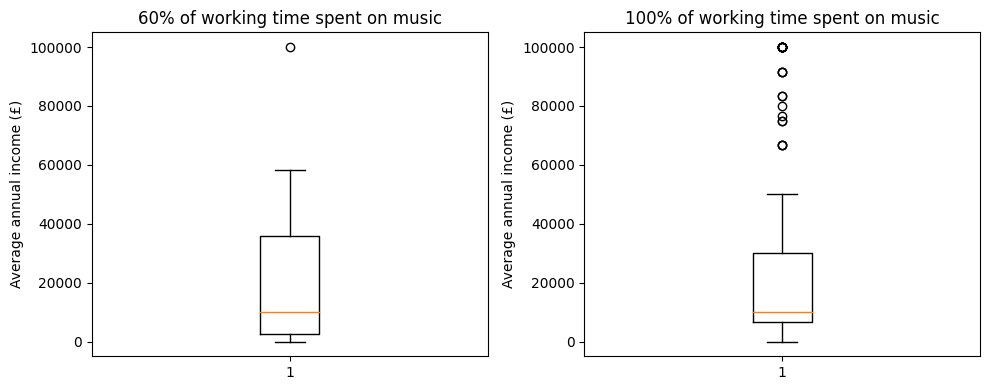

In [125]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))


axes[1].boxplot(perc_time_100)
axes[1].set_title('100% of working time spent on music')
axes[1].set_ylabel('Average annual income (£)')

axes[0].boxplot(perc_time_60)
axes[0].set_title('60% of working time spent on music')
axes[0].set_ylabel('Average annual income (£)')

plt.tight_layout()

plt.show()

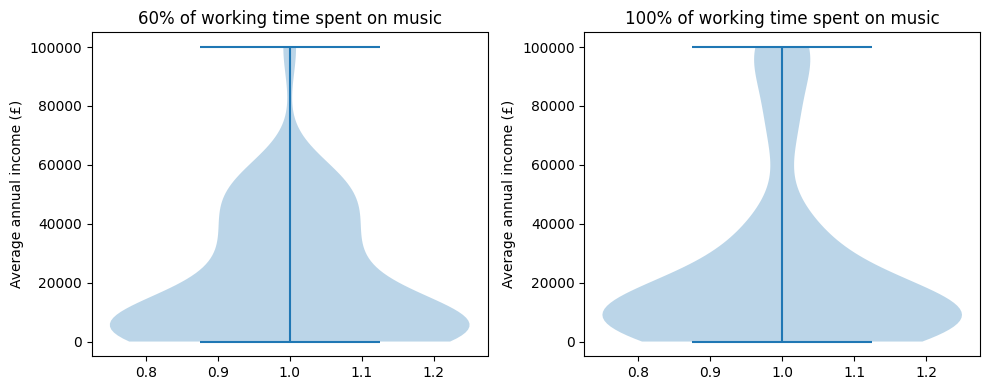

In [126]:
#Violinplots would give me a better sense of where the high income dots are clustered

fig, axes = plt.subplots(1, 2, figsize=(10,4))


axes[1].violinplot(perc_time_100)
axes[1].set_title('100% of working time spent on music')
axes[1].set_ylabel('Average annual income (£)')

axes[0].violinplot(perc_time_60)
axes[0].set_title('60% of working time spent on music')
axes[0].set_ylabel('Average annual income (£)')

plt.tight_layout()

plt.show()

In [127]:
#I want to compare the top quartile earners of the two categories to see what effect working time has on max earnings

n = len(perc_time_100)
0.25*(n+1)

upper_quartile = int(len(perc_time_100)-0.25*(n+1))

upper_q_perc_time_100 = perc_time_100[upper_quartile:len(perc_time_100)]

In [128]:
n = len(perc_time_60)
0.25*(n+1)

upper_quartile = int(len(perc_time_60)-0.25*(n+1))

upper_q_perc_time_60 = perc_time_60[upper_quartile:len(perc_time_60)]

In [129]:
print('Mean earnings of the highest quartiles of each of the 60% and 100% of time spent on music categories:')
print(f'Highest quartile mean earnings for 100% of time spent on music: £ {round(upper_q_perc_time_100.mean())}')
print(f'Highest quartile mean earnings for 60% of time spent on music: £ {round(upper_q_perc_time_60.mean())}')
print(f'Highest quartile median earnings for 100% of time spent on music: £ {round(upper_q_perc_time_100.median())}')
print(f'Highest quartile median earnings for 60% of time spent on music: £ {round(upper_q_perc_time_60.median())}')


Mean earnings of the highest quartiles of each of the 60% and 100% of time spent on music categories:
Highest quartile mean earnings for 100% of time spent on music: £ 68430
Highest quartile mean earnings for 60% of time spent on music: £ 52052
Highest quartile median earnings for 100% of time spent on music: £ 75001
Highest quartile median earnings for 60% of time spent on music: £ 50001


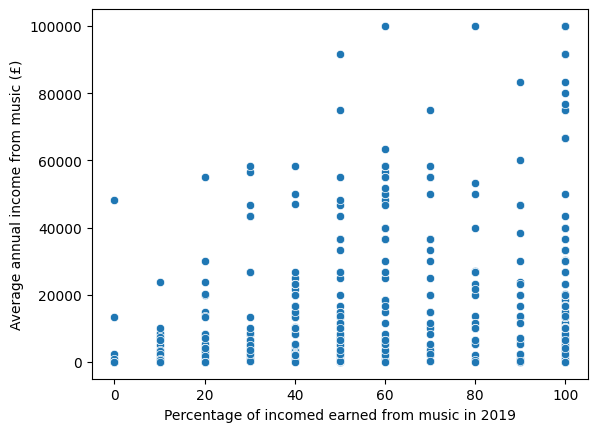

In [130]:
perc_vs_ave

In [131]:
df_income_time_percs.drop(columns='Money earned divided by percentage of time worked', inplace=True)
df_income_time_percs.style.applymap(lambda x: 'background-color : yellow' if x==1 else '')

,Mean % of working time spent on music,Mean average income from music,Efficiency scores
% of income from music,,,
100,96.691729,27354.248120,0.581846
90,84.000000,19920.920000,0.487756
80,76.666667,20514.916667,0.550346
70,70.000000,22115.896552,0.649799
60,60.952381,29635.904762,1.000000
50,54.444444,15618.259259,0.589999
40,48.235294,12478.117647,0.532055
30,44.680851,9837.829787,0.452846
20,36.666667,6060.155556,0.339926


<div style="background-color:Bisque;
            font-size:100%;
            font-family:Verdana;
            color:black;
            padding:20px;
            border-radius:5px;">

All of the above analysis shows that, interestingly, the 60% category are by far the most efficient, with second and third being the 50 and 100 categories respectively, at 0.59 and 0.58.

It shows that those spending 60% of their time on music earn the highest mean, with those spending 100% coming second.

It also shows that those earning 60% of their income from music, and spending roughly 60% of their working time on music, are earning the same median income as those spending 100% of their time and fullying relying on music for their income.

Where those who spend 100% of their time on music outperform those spending 60% is in the earnings of the highest earning quartile. The mean averages respectively are  £68,430 to £52,052, and the median earners are £75,001 to £50,001.

The relationships between working time spent and income, and percentage of income from music and income, are non-linear and therefore these features are still not especially well suited to linear regression models.

There is evidently some pattern of more time spent on music leading to higher incomes, but as the above figure shows, it would still be impossible to predict the income of any given individual from this data. It does broadly show an upwards trend, but even in the most successful categories of 60% and 100% the spread is huge, and there are still individuals earning nothing whilst others may earn £50-100,000.



In [132]:
#print(df_musicians_target_cheapnumeric.columns.values)

In [133]:
df_income_sources = df_musicians_target_cheapnumeric.iloc[:,52:71]

## Analysing the average incomes according to main income sources

This shows a clear correlation between income source and both median and average income.
Note that these income sources are not exclusive - a creator can have any number of different income categories.
It would be interesting to see how many values there are in each category, to get a sense of how robust this is.

In [134]:
df_musicians_target_cheapnumeric.iloc[:,52:71]

,2019 income source percentage - Live performances,2019 income source percentage - Audio streaming royalties,2019 income source percentage - Video streaming royalties,2019 income source percentage - Other online revenue (e.g. ads/promo etc.),2019 income source percentage - Digital sales (e.g. downloads),2019 income source percentage - Physical sales (e.g. CD and vinyl),2019 income source percentage - Brand/sponsorship deals,"2019 income source percentage - Direct licensing/sync (e.g. use of music in film, TV, games etc.)",2019 income source percentage - Session or orchestral work (e.g. studio recordings),"2019 income source percentage - Advances (e.g. against future recording, publishing royalties)",2019 income source percentage - Teaching music,2019 income source percentage - Broadcast (e.g. radio and TV use of your music),2019 income source percentage - Merchandise,2019 income source percentage - Mechanical royalties,2019 income source percentage - Public performance (e.g. music played in shops),"2019 income source percentage - Commissions for broadcast/other media (e.g. TV programmes, films, games)",2019 income source percentage - Commissions for stage (e.g. theatre productions),2019 income source percentage - Printed music sales/hire,2019 income source percentage - Other
0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,10.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,30.0,0.0,0.0,10.0,0.0,10.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
658,50.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,30.0,5.0,0.0,0.0,0.0,0.0
659,60.0,2.0,1.0,0.0,1.0,2.0,0.0,10.0,0.0,0.0,0.0,10.0,5.0,4.0,5.0,0.0,0.0,0.0,0.0
660,50.0,0.0,0.0,0.0,0.0,5.0,0.0,5.0,0.0,0.0,20.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0


In [135]:
'''
For each row:

Find the highest, second highest
Store each as a variable
For each row, all columns with those variables, replace with 101 (a unique value)
Set all columns for that row which do not equal 101 to zero

'''

'\nFor each row:\n\nFind the highest, second highest\nStore each as a variable\nFor each row, all columns with those variables, replace with 101 (a unique value)\nSet all columns for that row which do not equal 101 to zero\n\n'

In [136]:
df_income_sources_OH = df_income_sources.copy(deep=True)

In [137]:
df_income_sources.head()

,2019 income source percentage - Live performances,2019 income source percentage - Audio streaming royalties,2019 income source percentage - Video streaming royalties,2019 income source percentage - Other online revenue (e.g. ads/promo etc.),2019 income source percentage - Digital sales (e.g. downloads),2019 income source percentage - Physical sales (e.g. CD and vinyl),2019 income source percentage - Brand/sponsorship deals,"2019 income source percentage - Direct licensing/sync (e.g. use of music in film, TV, games etc.)",2019 income source percentage - Session or orchestral work (e.g. studio recordings),"2019 income source percentage - Advances (e.g. against future recording, publishing royalties)",2019 income source percentage - Teaching music,2019 income source percentage - Broadcast (e.g. radio and TV use of your music),2019 income source percentage - Merchandise,2019 income source percentage - Mechanical royalties,2019 income source percentage - Public performance (e.g. music played in shops),"2019 income source percentage - Commissions for broadcast/other media (e.g. TV programmes, films, games)",2019 income source percentage - Commissions for stage (e.g. theatre productions),2019 income source percentage - Printed music sales/hire,2019 income source percentage - Other
0,70.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,10.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,30.0,0.0,0.0,10.0,0.0,10.0,0.0
4,30.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0


In [138]:
df_income_sources_OH = df_income_sources.copy(deep=True)

ones = [1]*662


df_income_sources_OH

for index, row in df_income_sources_OH.iterrows():
    values = row.values.tolist()
    values.sort(reverse=True)

    highest = values[0]
    second = values[1]

    for column in df_income_sources_OH.columns:
        if row[column] == highest:
            df_income_sources_OH.at[index, column] = 1
        elif row[column] == second and row[column] != 0:
            df_income_sources_OH.at[index, column] = 2
        else:
            df_income_sources_OH.at[index, column] = 0
            
df_income_sources_OH['Average annual income'] = df_musicians_target_cheapnumeric['Average annual income']
df_income_sources_OH.astype(int)


,2019 income source percentage - Live performances,2019 income source percentage - Audio streaming royalties,2019 income source percentage - Video streaming royalties,2019 income source percentage - Other online revenue (e.g. ads/promo etc.),2019 income source percentage - Digital sales (e.g. downloads),2019 income source percentage - Physical sales (e.g. CD and vinyl),2019 income source percentage - Brand/sponsorship deals,"2019 income source percentage - Direct licensing/sync (e.g. use of music in film, TV, games etc.)",2019 income source percentage - Session or orchestral work (e.g. studio recordings),"2019 income source percentage - Advances (e.g. against future recording, publishing royalties)",2019 income source percentage - Teaching music,2019 income source percentage - Broadcast (e.g. radio and TV use of your music),2019 income source percentage - Merchandise,2019 income source percentage - Mechanical royalties,2019 income source percentage - Public performance (e.g. music played in shops),"2019 income source percentage - Commissions for broadcast/other media (e.g. TV programmes, films, games)",2019 income source percentage - Commissions for stage (e.g. theatre productions),2019 income source percentage - Printed music sales/hire,2019 income source percentage - Other,Average annual income
0,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,334
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3334
3,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,75001
4,2,0,0,0,0,0,2,0,0,0,0,0,0,0,1,0,0,0,0,40001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
658,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1001
659,1,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,76667
660,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,668


In [139]:
top_income_sources_dict = {}
top_income_sources = [
    'Live performance',
    'Streaming royalties',
    'Video royalties',
    'Other online',
    'Digital sales',
    'Physical sales',
    'Brand sponsorship',
    'Direct Licensing',
    'Sessions and orchestra',
    'Advances',
    'Teaching',
    'Broadcasting e.g. tv, radio',
    'Merchandise',
    'Mechanicals',
    'Public performance',
    'Broadcast commissions',
    'Stage commissions',
    'Printed music sales',
    'Other',
]

count = 0

for x in df_income_sources_OH.columns:
    list_name = f'{top_income_sources[count]}'
    top_income_sources_dict[list_name] = [df_income_sources_OH['Average annual income'][df_income_sources_OH[x]==1]]
    if count <=17:
        count+=1
    else:
        break

In [140]:
second_income_sources_dict = {}

count = 0

for x in df_income_sources_OH.columns:
    list_name = f'{top_income_sources[count]}'
    second_income_sources_dict[list_name] = [df_income_sources_OH['Average annual income'][df_income_sources_OH[x]==2]]
    if count <=17:
        count+=1
    else:
        break


In [141]:
#for key in income_sources_dict:
    #print(f'{key} mean average income: £{income_sources_dict[key].mean()}')
    
import statistics as stats

mean_averages_by_top_source = []
median_averages_by_top_source = []
titles = []

for key in top_income_sources_dict:
    for value in top_income_sources_dict[key]:
        mean_averages_by_top_source.append(value.mean())
        median_averages_by_top_source.append(value.median())
    
for key in top_income_sources_dict:
    titles.append(key)

df_averages_by_top_source = pd.DataFrame()
df_averages_by_top_source['Average incomes'] = mean_averages_by_top_source
df_averages_by_top_source['Median incomes'] = median_averages_by_top_source
df_averages_by_top_source['Income sources'] = titles

print(mean_averages_by_top_source)

[10312.649659863946, 12273.25974025974, 13048.981818181817, 6778.166666666667, 6069.922077922078, 8020.220588235294, 10449.25, 9470.80357142857, 13333.833333333334, 11190.292307692307, 8023.578431372549, 13432.8125, 8179.518518518518, 9294.549019607843, 6881.864406779661, 10891.4, 6901.1578947368425, 7363.355555555556, 7712.882352941177]


In [142]:
import statistics

#for key in income_sources_dict:
    #print(f'{key} mean average income: £{income_sources_dict[key].mean()}')
    
mean_averages_by_second_source = []
median_averages_by_second_source = []
titles = []

for key in second_income_sources_dict:
    for value in second_income_sources_dict[key]:
        mean_averages_by_second_source.append(value.mean())
        median_averages_by_second_source.append(value.median())
    
for key in second_income_sources_dict:
    titles.append(key)

df_averages_by_second_source = pd.DataFrame()
df_averages_by_second_source['Average incomes'] = mean_averages_by_second_source
df_averages_by_second_source['Median incomes'] = median_averages_by_second_source
df_averages_by_second_source['Income sources'] = titles


In [143]:
df_averages_by_top_source_sorted = df_averages_by_top_source.sort_values(by='Average incomes', ascending=True)

#best to chart these on a single barplot using a 'melt'
df_top_melted = df_averages_by_top_source_sorted.melt(id_vars=['Income sources'], value_vars=['Median incomes', 'Average incomes'])


In [144]:
df_averages_by_second_source_sorted = df_averages_by_second_source.sort_values(by='Average incomes', ascending=True)

#best to chart these on a single barplot using a 'melt'
df_second_melted = df_averages_by_second_source_sorted.melt(id_vars=['Income sources'], value_vars=['Median incomes', 'Average incomes'])


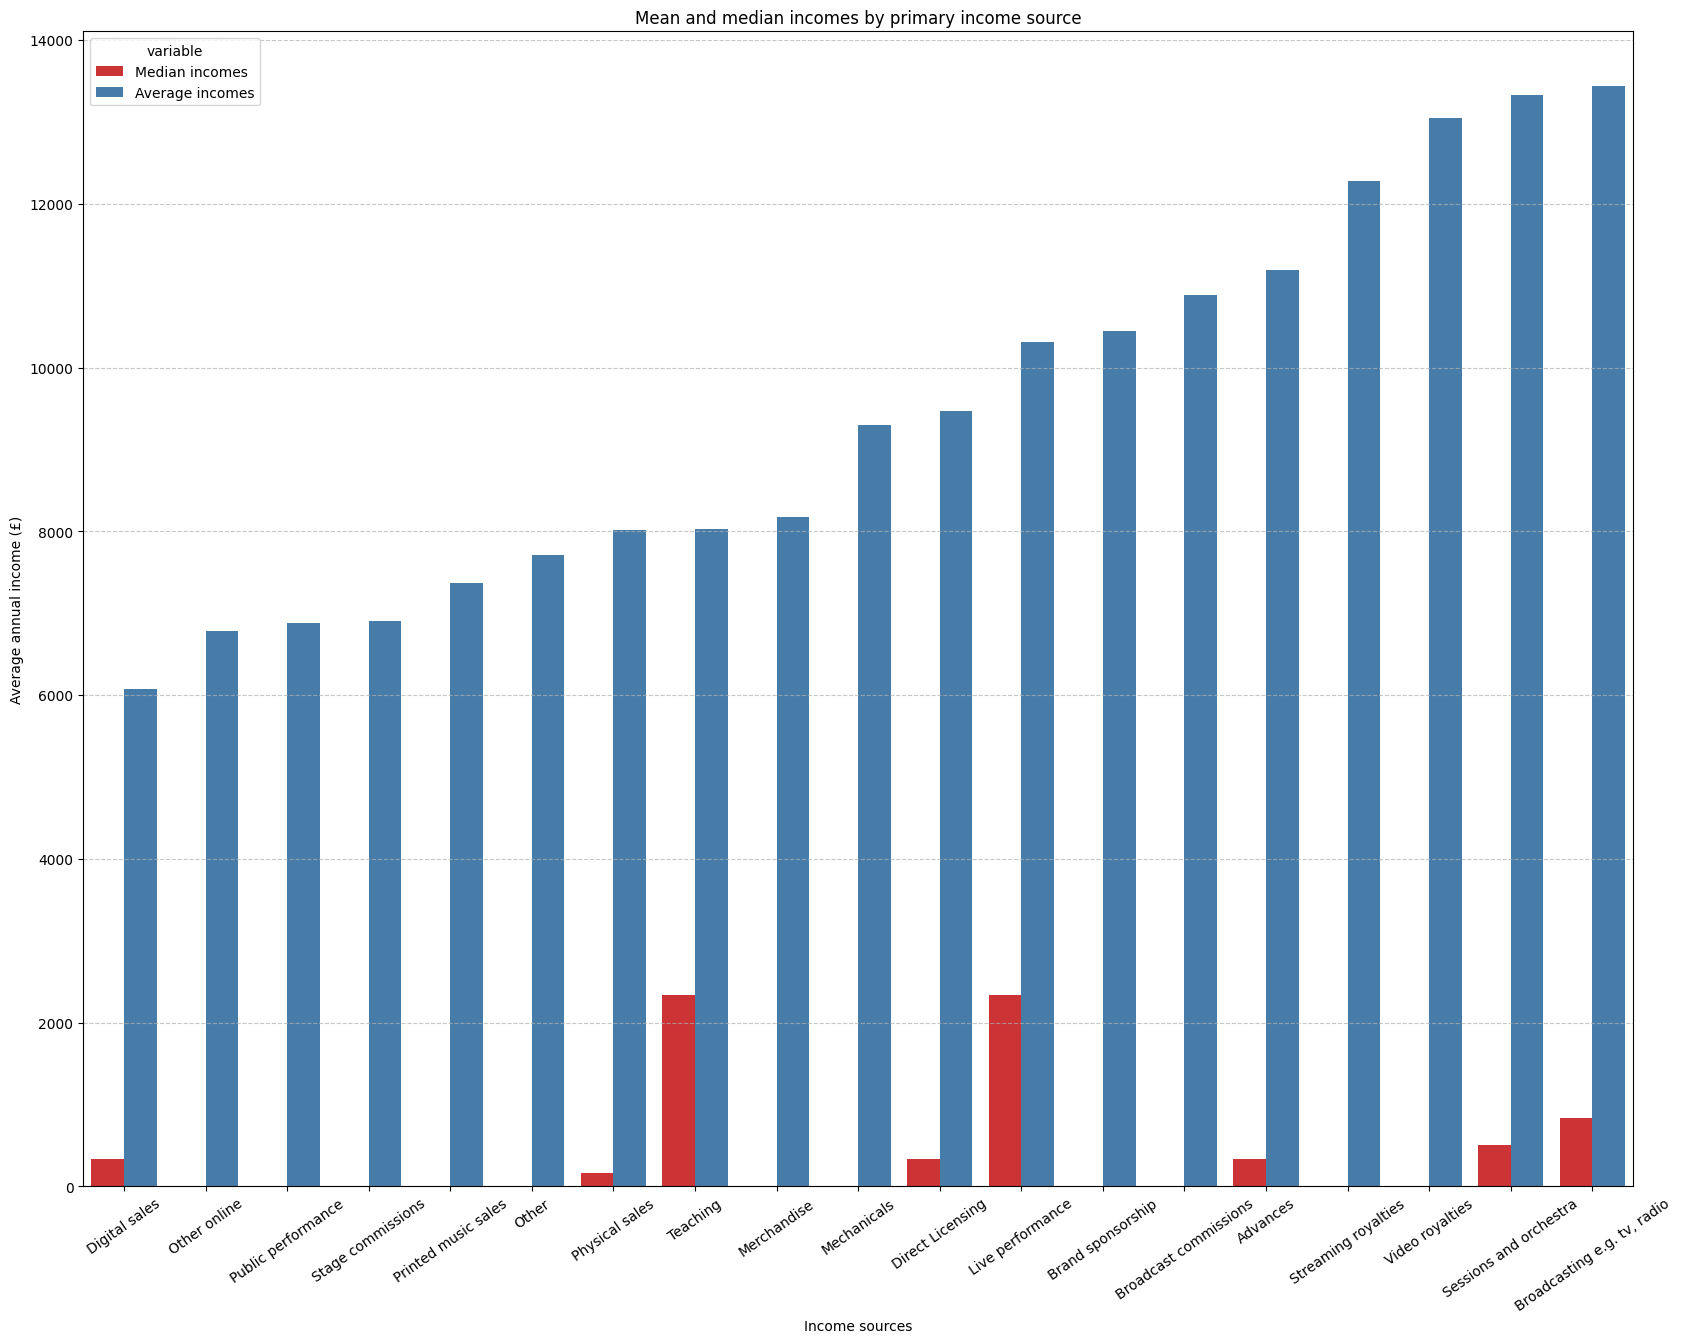

In [145]:
chart = plt.figure(figsize=(20,15))
sns.barplot(data=df_top_melted, x='Income sources', y='value', hue='variable', palette='Set1')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylabel('Average annual income (£)')
plt.title('Mean and median incomes by primary income source')
plt.xticks(rotation=35)
plt.show()

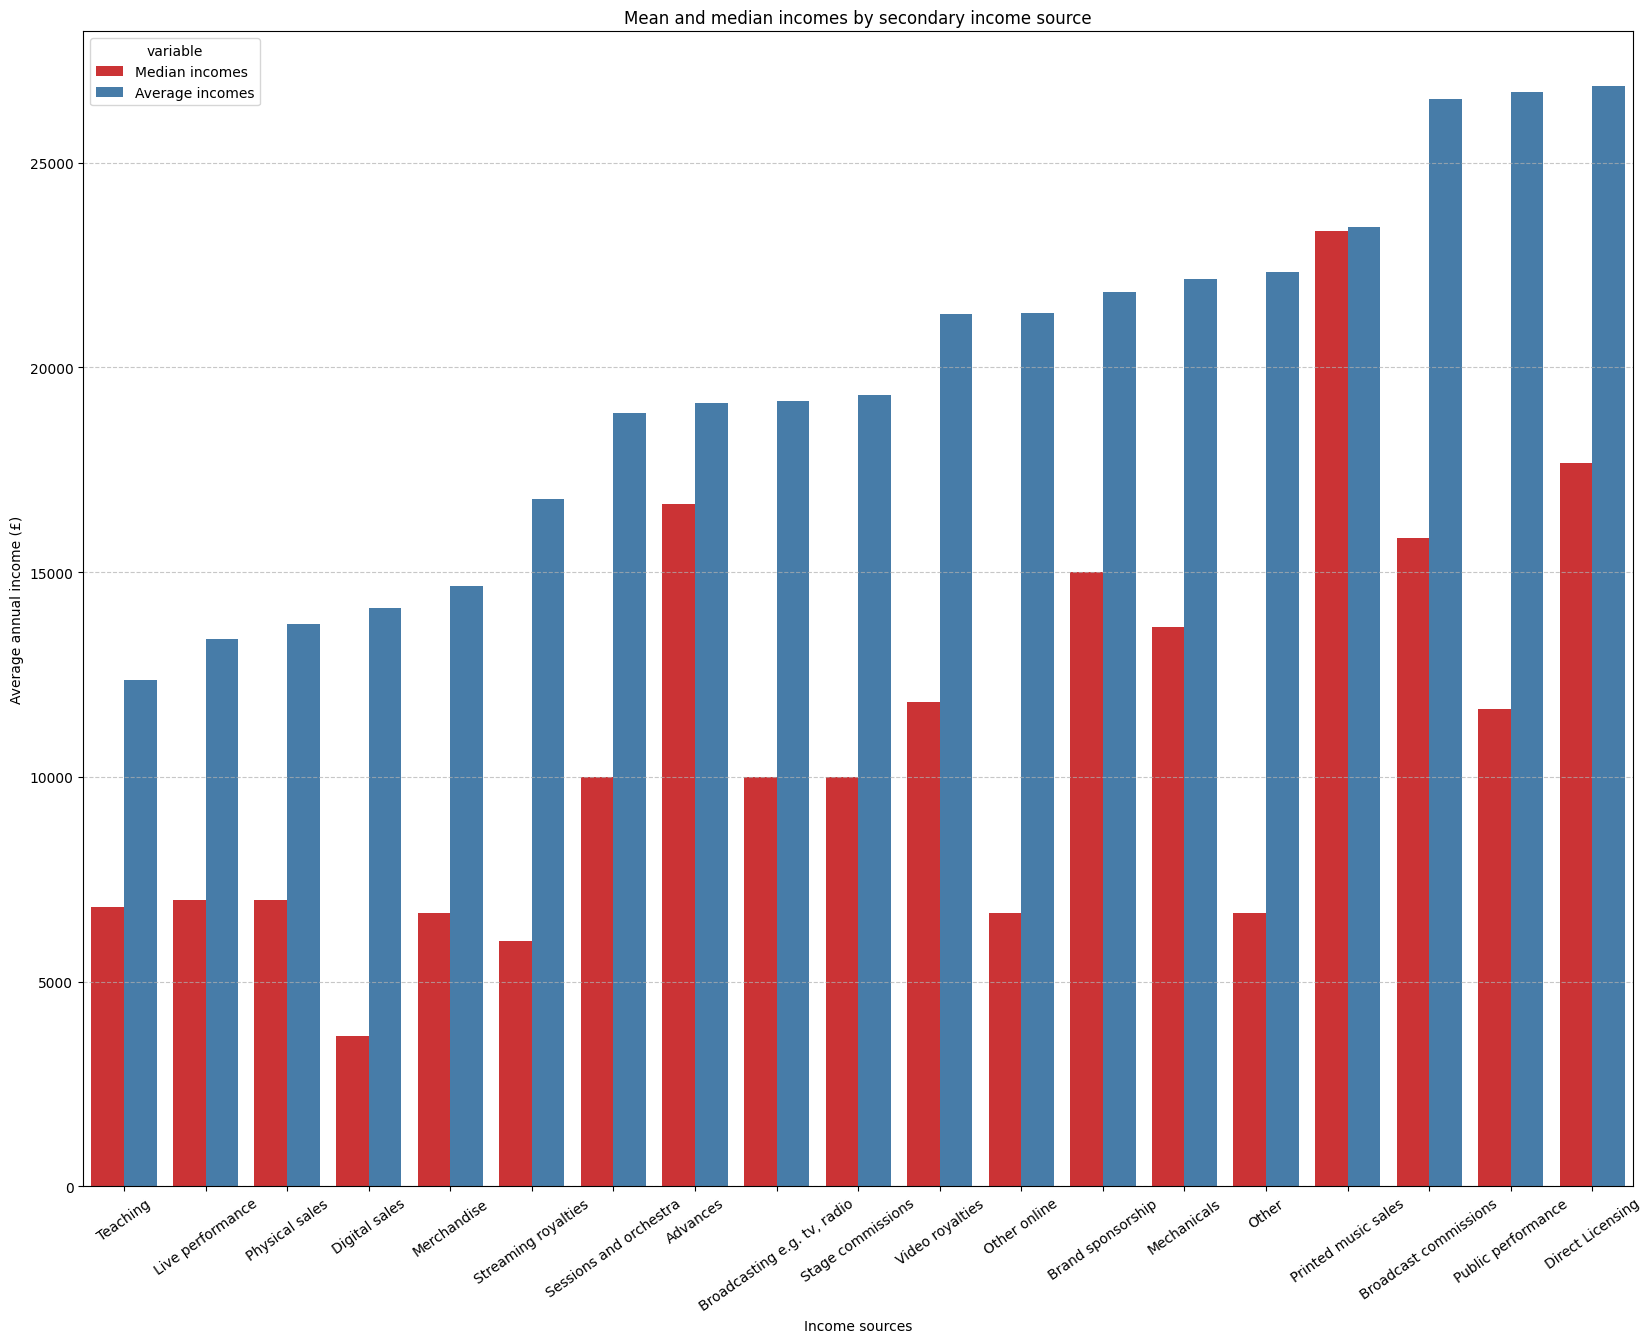

In [146]:
chart = plt.figure(figsize=(20,15))
sns.barplot(data=df_second_melted, x='Income sources', y='value', hue='variable', palette='Set1')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylabel('Average annual income (£)')
plt.title('Mean and median incomes by secondary income source')
plt.xticks(rotation=35)
plt.show()

The first thing to notice is that the means and medians are higher in the second category.
Could this be related to the numbers of answers for highest and second-highest sources of income?

In [147]:
'''for column in df_income_sources_OH.columns:
    print(df_income_sources_OH.loc[:,column].value_counts())'''

'for column in df_income_sources_OH.columns:\n    print(df_income_sources_OH.loc[:,column].value_counts())'

In [148]:
ones = 0
twos = 0

for column in df_income_sources_OH.columns:
    for value in df_income_sources_OH[column].values:
        if value==2:
            twos+=1
        elif value==1:
            ones+=1
            
print('Number of primary incomes listed: ', ones, 'Number of secondary incomes listed: ', twos)

Number of primary incomes listed:  1499 Number of secondary incomes listed:  686


There were far more primary income answers listed than secondary. There will be duplicates where there were multiple equally high incomes for a respondent. Perhaps those who list a second income are simply more likely to earn a higher amount?

In [149]:
ones = 0
twos = 0

for column in df_income_sources_OH.columns:
    for value in df_income_sources_OH[column].values:
        if value==2:
            twos+=1
        elif value==1:
            ones+=1
            
print('Number of ones: ', ones, 'Number of twos: ', twos)

Number of ones:  1499 Number of twos:  686


In [150]:
import statistics

ones_indices = []
twos_indices = []
only_ones_indices = []

ones_all_incomes = []
twos_all_incomes = []
only_ones_all_incomes = []

for index in df_income_sources_OH.index.values:
    if 1 in df_income_sources_OH.iloc[index].values:
        ones_indices.append(index)
    if 2 in df_income_sources_OH.iloc[index].values:
        twos_indices.append(index)
    if 1 in df_income_sources_OH.iloc[index].values and 2 not in df_income_sources_OH.iloc[index].values:
        only_ones_indices.append(index)

print('Respondents with a primary income: ',len(ones_indices))        
print('Respondents with a secondary income: ',len(twos_indices))
print('Respondents with only a primary income: ',len(only_ones_indices))

for value in ones_indices:
    ones_all_incomes.append(df_income_sources_OH.iloc[value,19])

for value in twos_indices:
    twos_all_incomes.append(df_income_sources_OH.iloc[value,19])

for value in only_ones_indices:
    only_ones_all_incomes.append(df_income_sources_OH.iloc[value,19])


print('mean income of respondents who list a primary income: £', sum(ones_all_incomes)/len(ones_all_incomes))
print('mean income of respondents who list a secondary income: £', sum(twos_all_incomes)/len(twos_all_incomes))
print('mean income of respondents who list no secondary income: £', sum(only_ones_all_incomes)/len(only_ones_all_incomes))

Respondents with a primary income:  662
Respondents with a secondary income:  387
Respondents with only a primary income:  275
mean income of respondents who list a primary income: £ 13512.987915407855
mean income of respondents who list a secondary income: £ 15762.348837209302
mean income of respondents who list no secondary income: £ 10347.523636363636


/tmp/ipykernel_21/1408083601.py:20: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_21/1408083601.py:25: UserWarning:

FixedFormatter should only be used together with FixedLocator

/tmp/ipykernel_21/1408083601.py:30: UserWarning:

FixedFormatter should only be used together with FixedLocator



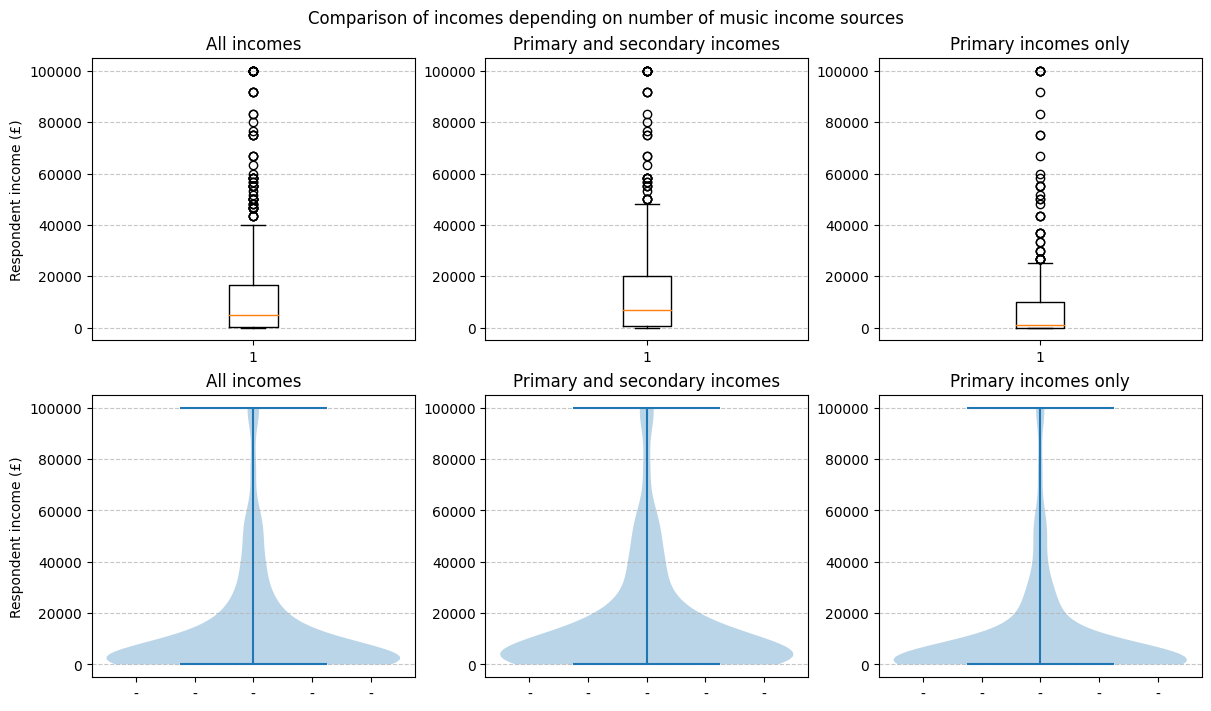

In [151]:
fig, axes = plt.subplots(ncols=3, nrows=2, layout="constrained", figsize=(12,7))

axes[0, 0].boxplot(ones_all_incomes)
axes[0, 0].set_title('All incomes')
axes[0,0].grid(axis='y', linestyle='--', alpha=0.7)
axes[0,0].set_ylabel('Respondent income (£)')

axes[0, 1].boxplot(twos_all_incomes)
axes[0, 1].set_title('Primary and secondary incomes')
axes[0,1].grid(axis='y', linestyle='--', alpha=0.7)

axes[0, 2].boxplot(only_ones_all_incomes)
axes[0, 2].set_title('Primary incomes only')
axes[0,2].grid(axis='y', linestyle='--', alpha=0.7)

axes[1, 0].violinplot(ones_all_incomes)
axes[1, 0].set_title('All incomes')
axes[1,0].grid(axis='y', linestyle='--', alpha=0.7)
axes[1,0].set_ylabel('Respondent income (£)')
axes[1,0].set_xticklabels('-------')

axes[1, 1].violinplot(twos_all_incomes)
axes[1, 1].set_title('Primary and secondary incomes')
axes[1,1].grid(axis='y', linestyle='--', alpha=0.7)
axes[1,1].set_xticklabels('-------')

axes[1, 2].violinplot(only_ones_all_incomes)
axes[1, 2].set_title('Primary incomes only')
axes[1,2].grid(axis='y', linestyle='--', alpha=0.7)
axes[1,2].set_xticklabels('-------')

fig.suptitle('Comparison of incomes depending on number of music income sources')

plt.show()

<div style="background-color:Bisque;
            font-size:100%;
            font-family:Verdana;
            color:black;
            padding:20px;
            border-radius:5px;">

This shows that respondents who have only one source of income fare the worst over all metrics, with lowest median, lowest maximum when excluding outliers, and a small interquartile range focused in the lowest range of incomes.

The lower incomes of those who have no secondary music income greatly reduces the averages for the whole dataset, with those who have both primary and secondary income sources scoring much better.

## Social media followers vs income

In [152]:
a = non_numeric_columns['Approximately how many followers do you have across all social media platforms (Facebook, Instagram, Twitter etc.) you are active on?']
social_followers = []
social_followers_dict = {}

for x in a.unique():
    social_followers.append(x)

social_followers.remove('Prefer not to say')

for x in social_followers:
    list_name = f'{x}'
    social_followers_dict[list_name] = df_musicians_target_cheapnumeric['Average annual income'][a==x]

social_followers_dict['1-20'] = social_followers_dict['Jan-20']
social_followers_dict.pop('Jan-20')
social_followers_dict['0'] = social_followers_dict['I am not active on any social media platforms']
social_followers_dict.pop('I am not active on any social media platforms')

desired_order_list = ['0','1-20','21-100','101-1000','1001-10,000','10,001-100,000','100,001-1,000,000','1,000,000']

social_followers_dict_ordered = {k: social_followers_dict[k] for k in desired_order_list}
    

fig = go.Figure()
for x in social_followers_dict_ordered.keys():
    fig.add_trace(go.Box(y=social_followers_dict_ordered[x], name=f'{x} social media followers', boxpoints='all'))

fig.update_layout(title='Income according to number of social media followers')
    
fig.show()

for key in social_followers_dict_ordered:
    print(f'Number of respondents with {key} followers:', len(social_followers_dict_ordered[key]))

Number of respondents with 0 followers: 41
Number of respondents with 1-20 followers: 14
Number of respondents with 21-100 followers: 30
Number of respondents with 101-1000 followers: 200
Number of respondents with 1001-10,000 followers: 220
Number of respondents with 10,001-100,000 followers: 98
Number of respondents with 100,001-1,000,000 followers: 35
Number of respondents with 1,000,000 followers: 4


<div style="background-color:Bisque;
            font-size:100%;
            font-family:Verdana;
            color:black;
            padding:20px;
            border-radius:5px;">

This shows another interesting result. Broadly, social media followers correlates with higher income, but the 100k to 1 million followers category outperforms the 1 million plus category on all metrics, with higher maximum, IQR, and median. This is reminiscent of the 60% of time spent on music correlating to the highest income.

## Year started vs income

In [153]:
#What would I like to see from this?
#Simply the correlation between years in the game and income

#non_numeric_columns['Roughly what year did you start your music career?'].value_counts()


In [154]:
df_year_started = pd.DataFrame(non_numeric_columns['Roughly what year did you start your music career?'].copy(deep=True))
df_year_started['Average annual income'] = df_musicians_target_averaged['Average annual income']
df_year_started

,Roughly what year did you start your music career?,Average annual income
0,2007,1.0
1,2007,334.0
2,1999,3334.0
3,2009,75001.0
4,2009,40001.0
...,...,...
657,Before 1980,1.0
658,2011,1001.0
659,1981,76667.0
660,2013,668.0


In [155]:
non_numeric_columns['Roughly what year did you start your music career?'].value_counts()

year_started = []

for x in non_numeric_columns['Roughly what year did you start your music career?'].unique():
    year_started.append(x)

year_started.sort()
year_started.remove('Before 1980')
year_started.insert(0, 'Before 1980')


In [156]:
import plotly.graph_objects as go
fig = go.Figure()
for x in year_started:
    fig.add_trace(go.Box(y=df_year_started['Average annual income'][non_numeric_columns['Roughly what year did you start your music career?']==x], name=f'Career started in {x}'))

fig.update_layout(title='Income according to the year a respondent began their music career')
    
fig.show()

<div style="background-color:Bisque;
            font-size:100%;
            font-family:Verdana;
            color:black;
            padding:20px;
            border-radius:5px;">

There is no apparent correlation here.

## Amount of music published for streaming

In [157]:
df_streamable_tracks = pd.DataFrame(non_numeric_columns['And approximately how many tracks that you have been involved in creating are available via streaming services?'].copy(deep=True))
df_streamable_tracks['Average annual income'] = df_musicians_target_averaged['Average annual income']
df_streamable_tracks.dropna(inplace=True)
df_streamable_tracks.rename(columns={'And approximately how many tracks that you have been involved in creating are available via streaming services?':'Number of tracks available to stream'}, inplace=True)
df_streamable_tracks.replace({'1-May':int(1),
                              '6-Oct':int(6),
                              'Nov-20':int(10),
                              '21-30':int(21),
                              '31-50':int(31),
                              '51-75':int(51),
                              '76-100':int(76),
                              '101':int(101)
                             },inplace=True)
df_streamable_tracks['Number of tracks available to stream']

df_streamable_tracks_sorted = df_streamable_tracks.sort_values(['Number of tracks available to stream']).copy(deep=True)

In [158]:
df_streamable_tracks_sorted = df_streamable_tracks.sort_values(['Number of tracks available to stream']).copy(deep=True)

In [159]:
import plotly.graph_objects as go

streamable_tracks_counts = []

for x in df_streamable_tracks_sorted['Number of tracks available to stream'].unique():
    streamable_tracks_counts.append(x)

fig = go.Figure()
for x in streamable_tracks_counts:
    fig.add_trace(go.Box(y=df_streamable_tracks_sorted['Average annual income'][df_streamable_tracks_sorted['Number of tracks available to stream']==x], boxpoints='all', name=f'Streamable tracks: {x}'))

fig.update_layout(title='Income according to number of tracks available on streaming platforms')
fig.show()

In [160]:
df_streamable_tracks_sorted.corr()

,Number of tracks available to stream,Average annual income
Number of tracks available to stream,1.000000,0.359111
Average annual income,0.359111,1.000000


# ML second round

<div style="background-color:LightSlateGray;
            font-size:105%;
            font-family:Verdana;
            color:white;
            padding:20px;
            border-radius:5px;">
    
<h4 style="font-size:115%;
    font-family:Verdana;
    color:white">The objective:</h4>
To iteratively train a set of classification models to arrive at the most predictive model and feature selection, and extract feature-importances from the most predictive model.

<h4 style="font-size:115%;
    font-family:Verdana;
    color:white">Summary of actions:</h4>
    <ul>
        <li> Selected the most predictive features from the EDA</li>
        <li> Iteratively trained random forest models to identify the parameters with the highest performance</li>
        <li> Trained a linear regression model for comparison with earlier models</li>
        <li> Identified the model most able to predict true positives</li>
        <li> Graphed the feature importances and Pearson correlations of each feature for the highest performing model</li>  
    </ul>
</div>

Selecting only the most significant features from my EDA:  
- Creatortype  
- Collaboration Status
- Inactive years between 2015-2021
- Label status
- Music as a percentage of income
- Multiple music income sources y/n
- Number of followers on social media
- Number of tracks available to stream


In [161]:
#Create a column for whether respondent has a secondary income

df_income_sources_OH['Has secondary income'] = np.zeros(len(df_income_sources_OH))

for index in df_income_sources_OH.index.values:
    if 2 in df_income_sources_OH.iloc[index].values:
        df_income_sources_OH['Has secondary income'][index]=1

In [162]:
df_musicians_target_cheapnumeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Columns: 101 entries, Engineer to Average annual income
dtypes: float64(25), int64(76)
memory usage: 522.5 KB


In [163]:
#Find the right columns to keep from the previously used numeric dataframe

keep_columns = []
keep_columns_list = []

keep_columns.append(
    [list(df_musicians_target_cheapnumeric.columns[0:7].values),
    list(df_musicians_target_cheapnumeric.columns[31:36].values),
    list(df_musicians_target_cheapnumeric.columns[37:42].values),
    list(df_musicians_target_cheapnumeric.columns[51:52].values),
    ])

for x in keep_columns:
    for y in x:
        for z in y:
            keep_columns_list.append(z)

In [164]:
#Keep only those variables which seemed significant in my EDA

df_ML_2 = df_musicians_target_cheapnumeric[keep_columns_list]

In [165]:
#Add in the new feature-engineered columns which were previously in the non-numeric dataframe

df_ML_2 = pd.concat([df_ML_2, df_musicians_target_averaged['Percentage of working time spent on music in 2019'],
           df_streamable_tracks['Number of tracks available to stream'],
           non_numeric_columns['Approximately how many followers do you have across all social media platforms (Facebook, Instagram, Twitter etc.) you are active on?'],
           df_musicians_target_averaged['Average annual income'],
           df_income_sources_OH['Has secondary income']
          ], axis=1)

df_ML_2.rename(columns={'Approximately how many followers do you have across all social media platforms (Facebook, Instagram, Twitter etc.) you are active on?':'Social media followers'}, inplace=True)

In [166]:
#Make sure all data is numeric and there are no nulls

df_ML_2.replace({'I am not active on any social media platforms':0,
                 'Prefer not to say':0,
                 'Jan-20':int(1),
                 '21-100':int(21),
                 '101-1000':int(101),
                 '1001-10,000':int(1001),
                 '10,001-100,000':int(10001),
                 '100,001-1,000,000':int(1000000),
                 '1,000,000':int(1000000)
                }, inplace=True)

df_ML_2['Number of tracks available to stream'].fillna(0, inplace=True)

In [167]:
#reframe the problem as a classification problem based on whether or not earns living wage
#drop the average income column

wage_positive_condition = df_ML_2['Average annual income'] >= 20000
wage_negative_condition = df_ML_2['Average annual income'] < 20000

df_ML_2.loc[wage_positive_condition, 'Earns living wage'] = 1
df_ML_2.loc[wage_negative_condition, 'Earns living wage'] = 0

df_ML_2.drop(columns='Average annual income', inplace=True)

df_ML_2['Earns living wage'] = df_ML_2['Earns living wage'].astype(int)

## The dataframe is now prepared for classification learning

In [168]:
df_ML_2['Earns living wage'].value_counts()

Earns living wage
0    514
1    148
Name: count, dtype: int64

In [169]:
#In tuning the model, the goal will be largely to improve the recall, understood as the ability to detect true positives

## Model A

<div style="background-color:LightSlateGray;
            font-size:105%;
            font-family:Verdana;
            color:white;
            padding:20px;
            border-radius:5px;">
Training on the feature-engineered dataframe

In [170]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

rf_model_a = RandomForestClassifier(n_estimators=1000, max_features=10, max_depth=6, random_state=0)
target = 'Earns living wage'

X_a,y = df_ML_2.drop(target, axis=1),df_ML_2[target]

X_train, X_test, y_train, y_test = train_test_split(X_a, y, random_state=42, test_size=0.2)

rf_model_a.fit(X_train, y_train)


RandomForestClassifier(max_depth=6, max_features=10, n_estimators=1000,
                       random_state=0)

In [171]:
from sklearn.metrics import confusion_matrix

train_cm = confusion_matrix(y_train, rf_model_a.predict(X_train))
test_cm = confusion_matrix(y_test, rf_model_a.predict(X_test))


In [172]:
from sklearn.metrics import accuracy_score

train_cm_df = pd.DataFrame(data=train_cm, columns=['Pred Negative', 'Pred Positive'], index=['Actual Negative', 'Actual Positive'])
train_cm_df.style.set_caption('Training Confusion Matrix')

,Pred Negative,Pred Positive
Actual Negative,403,5
Actual Positive,57,64


In [173]:
print('Accuracy score: ',accuracy_score(y_train, rf_model_a.predict(X_train)))

Accuracy score:  0.8827977315689981


In [174]:
test_cm_df = pd.DataFrame(data=test_cm, columns=['Pred Negative', 'Pred Positive'], index=['Actual Negative', 'Actual Positive'])
test_cm_df.style.set_caption('Test Confusion Matrix')

test_cm_df


,Pred Negative,Pred Positive
Actual Negative,99,7
Actual Positive,18,9


In [175]:
print('Accuracy score: ',accuracy_score(y_test, rf_model_a.predict(X_test)))

Accuracy score:  0.8120300751879699


In [176]:
from sklearn.metrics import classification_report
model_a_report = classification_report(y_test, rf_model_a.predict(X_test))
print(model_a_report)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       106
           1       0.56      0.33      0.42        27

    accuracy                           0.81       133
   macro avg       0.70      0.63      0.65       133
weighted avg       0.79      0.81      0.79       133



In [177]:
df_ML_2.columns

Index(['Engineer', 'Rapper/MC', 'DJ', 'Producer', 'Instrumentalist',
       'Vocalist', 'Songwriter/Composer', 'Collab - Ensemble/group member',
       'Collab - Band member', 'Collab - Trio member', 'Collab - Duo member',
       'Collab - Solo artist', 'Signed to major label',
       'Signed to indie label', 'Previously signed to major',
       'Previously signed to indie', 'Self-release\DIY',
       'Inactive years - 2015-21',
       'Percentage of working time spent on music in 2019',
       'Number of tracks available to stream', 'Social media followers',
       'Has secondary income', 'Earns living wage'],
      dtype='object')

In [178]:
df_ML_2_reduced = df_ML_2.drop(columns=df_ML_2.iloc[:,0:7])
df_ML_2_reduced = df_ML_2_reduced.drop(columns=['Collab - Ensemble/group member','Collab - Trio member', 'Previously signed to indie'])

## Model B

<div style="background-color:LightSlateGray;
            font-size:105%;
            font-family:Verdana;
            color:white;
            padding:20px;
            border-radius:5px;">
Training on the dataframe without the features which showed the weakest correlations in EDA.
    
Same depth as model A, with fewer max features per tree.
</div>

In [179]:
rf_model_b = RandomForestClassifier(n_estimators=1000, max_features=3, max_depth=6, random_state=0)
target = 'Earns living wage'

X,y = df_ML_2_reduced.drop(target, axis=1),df_ML_2_reduced[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

rf_model_b.fit(X_train, y_train)


RandomForestClassifier(max_depth=6, max_features=3, n_estimators=1000,
                       random_state=0)

In [180]:
from sklearn.metrics import confusion_matrix

train_cm = confusion_matrix(y_train, rf_model_b.predict(X_train))
test_cm = confusion_matrix(y_test, rf_model_b.predict(X_test))

print(train_cm)
print(test_cm)

[[402   6]
 [ 65  56]]
[[101   5]
 [ 19   8]]


In [181]:
from sklearn.metrics import accuracy_score

train_cm_df = pd.DataFrame(data=train_cm, columns=['Pred Negative', 'Pred Positive'], index=['Actual Negative', 'Actual Positive'])
train_cm_df.style.set_caption('Training Confusion Matrix')

,Pred Negative,Pred Positive
Actual Negative,402,6
Actual Positive,65,56


In [182]:
print('Accuracy score: ',accuracy_score(y_train, rf_model_b.predict(X_train)))

Accuracy score:  0.8657844990548205


In [183]:
test_cm_df = pd.DataFrame(data=test_cm, columns=['Pred Negative', 'Pred Positive'], index=['Actual Negative', 'Actual Positive'])
test_cm_df.style.set_caption('Test Confusion Matrix')

test_cm_df

,Pred Negative,Pred Positive
Actual Negative,101,5
Actual Positive,19,8


In [184]:
print('Accuracy score: ',accuracy_score(y_test, rf_model_b.predict(X_test)))

Accuracy score:  0.8195488721804511


In [185]:
from sklearn.metrics import classification_report

model_b_report = classification_report(y_test, rf_model_b.predict(X_test))

print(model_b_report)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       106
           1       0.62      0.30      0.40        27

    accuracy                           0.82       133
   macro avg       0.73      0.62      0.65       133
weighted avg       0.80      0.82      0.79       133



## Model A feature importances

In [186]:
#Gini impurity-based feature importances

importances = rf_model_a.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model_a.estimators_], axis=0)
feature_names = [f'{i}' for i in X_a.columns]

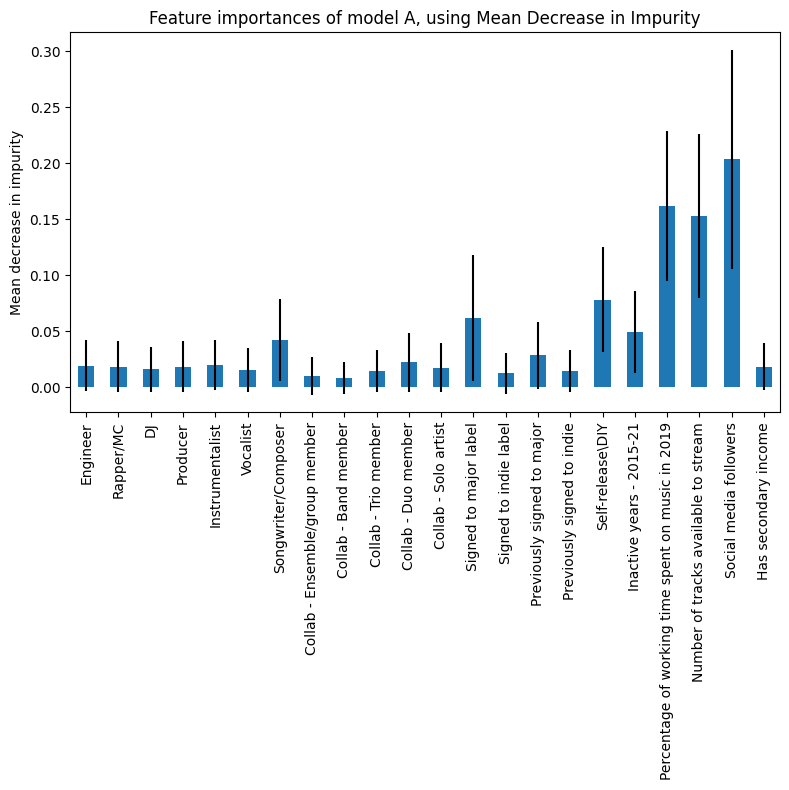

In [187]:
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots(figsize=(8,8))
forest_importances.plot.bar(yerr=std, ax=ax)
plt.xticks(rotation=90)
ax.set_title("Feature importances of model A, using Mean Decrease in Impurity")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

## Model C

<div style="background-color:LightSlateGray;
            font-size:105%;
            font-family:Verdana;
            color:white;
            padding:20px;
            border-radius:5px;">
Using the same data and number of features per tree as in model B, and reducing the max depth from 6 to 5
</div>

In [188]:
df_ML_2_reduced_2 = df_ML_2_reduced.drop(columns=['Collab - Band member','Collab - Duo member', 'Inactive years - 2015-21', 'Signed to major label', 'Signed to indie label'])

In [189]:
rf_model_c = RandomForestClassifier(n_estimators=1000, max_features=3, max_depth=5, random_state=0)
target = 'Earns living wage'

X,y = df_ML_2_reduced_2.drop(target, axis=1),df_ML_2_reduced_2[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

rf_model_c.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, max_features=3, n_estimators=1000,
                       random_state=0)

In [190]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

train_cm = confusion_matrix(y_train, rf_model_c.predict(X_train))
test_cm = confusion_matrix(y_test, rf_model_c.predict(X_test))

train_cm_df = pd.DataFrame(data=train_cm, columns=['Pred Negative', 'Pred Positive'], index=['Actual Negative', 'Actual Positive'])
train_cm_df.style.set_caption('Training Confusion Matrix')

,Pred Negative,Pred Positive
Actual Negative,397,11
Actual Positive,73,48


In [191]:
print('Accuracy score: ',accuracy_score(y_train, rf_model_c.predict(X_train)))

Accuracy score:  0.8412098298676749


In [192]:
test_cm_df = pd.DataFrame(data=test_cm, columns=['Pred Negative', 'Pred Positive'], index=['Actual Negative', 'Actual Positive'])
test_cm_df.style.set_caption('Test Confusion Matrix')

test_cm_df

,Pred Negative,Pred Positive
Actual Negative,98,8
Actual Positive,19,8


In [193]:
print('Accuracy score: ',accuracy_score(y_test, rf_model_c.predict(X_test)))

Accuracy score:  0.7969924812030075


In [194]:
from sklearn.metrics import classification_report

model_c_report = classification_report(y_test, rf_model_c.predict(X_test))
print(model_c_report)

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       106
           1       0.50      0.30      0.37        27

    accuracy                           0.80       133
   macro avg       0.67      0.61      0.63       133
weighted avg       0.77      0.80      0.78       133



## Model D

<div style="background-color:LightSlateGray;
            font-size:105%;
            font-family:Verdana;
            color:white;
            padding:20px;
            border-radius:5px;">
Dropping a further two of the least useful features
</div>

In [195]:
df_ML_2_reduced_3 = df_ML_2_reduced.drop(columns=['Self-release\DIY', 'Collab - Solo artist'])

In [196]:
rf_model_d = RandomForestClassifier(n_estimators=1000, max_features=3, max_depth=5, random_state=0)
target = 'Earns living wage'

X,y = df_ML_2_reduced_3.drop(target, axis=1),df_ML_2_reduced_3[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

rf_model_d.fit(X_train, y_train)


RandomForestClassifier(max_depth=5, max_features=3, n_estimators=1000,
                       random_state=0)

In [197]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

train_cm = confusion_matrix(y_train, rf_model_d.predict(X_train))
test_cm = confusion_matrix(y_test, rf_model_d.predict(X_test))

test_cm_df = pd.DataFrame(data=test_cm, columns=['Pred Negative', 'Pred Positive'], index=['Actual Negative', 'Actual Positive'])
test_cm_df.style.set_caption('Test Confusion Matrix')

test_cm_df

,Pred Negative,Pred Positive
Actual Negative,101,5
Actual Positive,21,6


In [198]:
print('Accuracy score: ',accuracy_score(y_test, rf_model_d.predict(X_test)))

Accuracy score:  0.8045112781954887


In [199]:
from sklearn.metrics import classification_report

model_d_report = classification_report(y_test, rf_model_d.predict(X_test))
print(model_d_report)

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       106
           1       0.55      0.22      0.32        27

    accuracy                           0.80       133
   macro avg       0.69      0.59      0.60       133
weighted avg       0.77      0.80      0.77       133



In [200]:
print(model_b_report)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       106
           1       0.62      0.30      0.40        27

    accuracy                           0.82       133
   macro avg       0.73      0.62      0.65       133
weighted avg       0.80      0.82      0.79       133



In [201]:
print('model a',model_a_report, 'Model b',model_b_report, 'Model c',model_c_report, 'Model d',model_d_report)

model a               precision    recall  f1-score   support

           0       0.85      0.93      0.89       106
           1       0.56      0.33      0.42        27

    accuracy                           0.81       133
   macro avg       0.70      0.63      0.65       133
weighted avg       0.79      0.81      0.79       133
 Model b               precision    recall  f1-score   support

           0       0.84      0.95      0.89       106
           1       0.62      0.30      0.40        27

    accuracy                           0.82       133
   macro avg       0.73      0.62      0.65       133
weighted avg       0.80      0.82      0.79       133
 Model c               precision    recall  f1-score   support

           0       0.84      0.92      0.88       106
           1       0.50      0.30      0.37        27

    accuracy                           0.80       133
   macro avg       0.67      0.61      0.63       133
weighted avg       0.77      0.80      0.78       

<div style="background-color:Bisque;
            font-size:100%;
            font-family:Verdana;
            color:black;
            padding:20px;
            border-radius:5px;">

These tests show that dropping even the least useful features results in a decreased recall for the model, which is problematic given that there are very few true values to detect. They also show that reducing tree depth comes at a cost to accuracy.
    
This establishes that any further filtering should occur from the dataframe and model used for model A.

## To evaluate whether the feature-engineering has improved regression-based modelling, I'll test a linear regression model

In [202]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

lr_model = LinearRegression()

X,y = df_ML_2_reduced.drop('Earns living wage', axis=1),df_musicians_target_averaged['Average annual income']

X_scaled = scaler.fit_transform(X)

X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.2)

lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [203]:
from sklearn.metrics import mean_squared_error

lr_prediction_test = lr_model.predict(X_test_scaled)
print('Root mean squared error: £',(mean_squared_error(lr_model.predict(X_test_scaled),y_test, squared=False)))

Root mean squared error: £ 19674.80832702595


In [204]:
lr_test_outputs = pd.DataFrame()
lr_test_outputs['True values'] = y_test
lr_test_outputs['Predicted values'] = lr_prediction_test

value_difference = []

lr_test_outputs.index = range(len(lr_test_outputs.index))

for row in lr_test_outputs.index:
    value_difference.append(abs(lr_test_outputs['Predicted values'].iloc[row]-lr_test_outputs['True values'].iloc[row]))

lr_test_outputs['Difference'] = value_difference


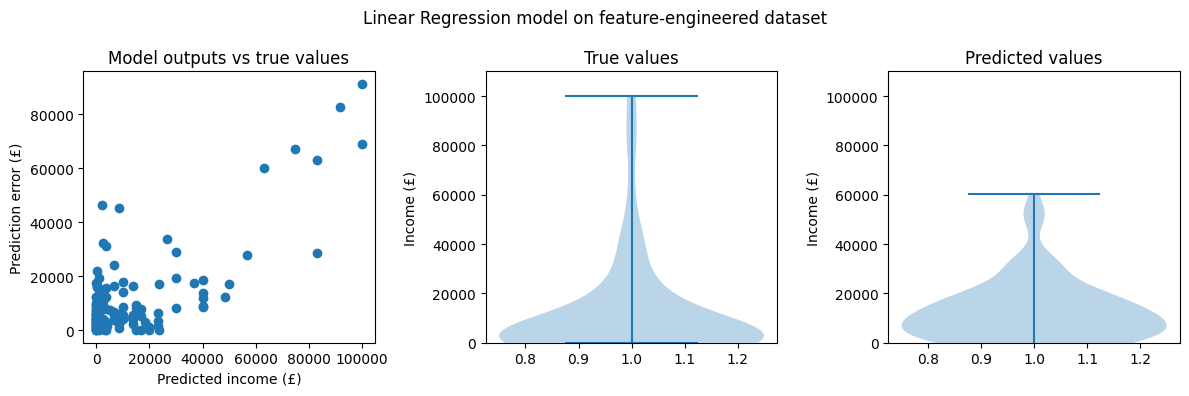

In [205]:
fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(12,4))

axes[0].scatter(x=lr_test_outputs['True values'], y=lr_test_outputs['Difference'])
axes[0].set_title('Model outputs vs true values')
axes[0].set_ylabel('Prediction error (£)')
axes[0].set_xlabel('Predicted income (£)')

axes[1].violinplot(y_test)
axes[1].set_ylim(0, 110000)
axes[1].set_title('True values')
axes[1].set_ylabel('Income (£)')

axes[2].violinplot(lr_prediction_test)
axes[2].set_ylim(0, 110000)
axes[2].set_ylabel('Income (£)')
axes[2].set_title('Predicted values')

fig.suptitle("Linear Regression model on feature-engineered dataset")

plt.tight_layout()

<div style="background-color:Bisque;
            font-size:100%;
            font-family:Verdana;
            color:black;
            padding:20px;
            border-radius:5px;">
The distribution of income values is better captured in this model than in the original linear regression model, which is an improvement. The RMS error however is not reduced, suggesting that I would not be able to improve the model's ability to predict the income of any specific musician. This confirms that reframing the problem as a classification problem is the most likely route to a predictive model.

## Final model changes

<div style="background-color:LightSlateGray;
            font-size:105%;
            font-family:Verdana;
            color:white;
            padding:20px;
            border-radius:5px;">
In order to improve model recall, narrow predictions to:
<ul>
    <li>Incomes for those spending >=40% of their working time on music;</li>
    <li>Incomes for those who list two sources of income.</li>
</ul>
</div>

## 40% or more of time spent on music

In [206]:
df_ML_2_moretime = df_ML_2[df_ML_2['Percentage of working time spent on music in 2019']>=40]

In [207]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

rf_model_d = RandomForestClassifier(n_estimators=1000, max_features=10, max_depth=6, random_state=0)
target = 'Earns living wage'

X_d,y = df_ML_2_moretime.drop(target, axis=1),df_ML_2_moretime[target]

X_train, X_test, y_train, y_test = train_test_split(X_d, y, random_state=42, test_size=0.2)

rf_model_d.fit(X_train, y_train)


RandomForestClassifier(max_depth=6, max_features=10, n_estimators=1000,
                       random_state=0)

In [208]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

train_cm = confusion_matrix(y_train, rf_model_d.predict(X_train))
test_cm = confusion_matrix(y_test, rf_model_d.predict(X_test))

test_cm_df = pd.DataFrame(data=test_cm, columns=['Pred Negative', 'Pred Positive'], index=['Actual Negative', 'Actual Positive'])
test_cm_df.style.set_caption('Test Confusion Matrix')

test_cm_df

,Pred Negative,Pred Positive
Actual Negative,53,6
Actual Positive,18,10


In [209]:
print('Accuracy score: ',accuracy_score(y_test, rf_model_d.predict(X_test)))

Accuracy score:  0.7241379310344828


## Multiple incomes and 40% or more of working time spent on music

In [210]:
df_ML_2_moretime_2income = df_ML_2_moretime[df_ML_2_moretime['Has secondary income']==1]
df_ML_2_moretime_2income = df_ML_2_moretime_2income.drop(columns=['DJ', 'Self-release\DIY'])

In [211]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

rf_model_e = RandomForestClassifier(n_estimators=1000, max_features=10, max_depth=6, random_state=0)
target = 'Earns living wage'

X_e,y = df_ML_2_moretime_2income.drop(target, axis=1),df_ML_2_moretime_2income[target]

X_train, X_test, y_train, y_test = train_test_split(X_e, y, random_state=42, test_size=0.2)

rf_model_e.fit(X_train, y_train)


RandomForestClassifier(max_depth=6, max_features=10, n_estimators=1000,
                       random_state=0)

In [212]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

train_cm = confusion_matrix(y_train, rf_model_e.predict(X_train))
test_cm = confusion_matrix(y_test, rf_model_e.predict(X_test))

test_cm_df = pd.DataFrame(data=test_cm, columns=['Pred Negative', 'Pred Positive'], index=['Actual Negative', 'Actual Positive'])
test_cm_df.style.set_caption('Test data Confusion Matrix')

train_cm_df = pd.DataFrame(data=train_cm, columns=['Pred Negative', 'Pred Positive'], index=['Actual Negative', 'Actual Positive'])
train_cm_df.style.set_caption('Training data Confusion Matrix')


,Pred Negative,Pred Positive
Actual Negative,156,8
Actual Positive,20,58


In [213]:
train_cm_df

,Pred Negative,Pred Positive
Actual Negative,156,8
Actual Positive,20,58


In [214]:
print('Accuracy score: ',accuracy_score(y_train, rf_model_e.predict(X_train)))

Accuracy score:  0.8842975206611571


In [215]:
test_cm_df

,Pred Negative,Pred Positive
Actual Negative,41,5
Actual Positive,7,8


In [216]:
print('Accuracy score: ',accuracy_score(y_test, rf_model_e.predict(X_test)))

Accuracy score:  0.8032786885245902


In [217]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rf_model_e.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87        46
           1       0.62      0.53      0.57        15

    accuracy                           0.80        61
   macro avg       0.73      0.71      0.72        61
weighted avg       0.80      0.80      0.80        61



# Interpretable results from the tested random forest models


In [218]:
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

rf_model = RandomForestClassifier(n_estimators=1000, max_features=10, max_depth=6, random_state=0)

models = {
    'Feature-engineered dataframe':[],
    'Dataframe using only those spending >=40% of time on music':[],
    'Dataframe using only those with multiple income sources':[],
    'Dataframe using only those with multiple income sources and >=40% of time on music':[],
}

df_ML_2_moretime = df_ML_2[df_ML_2['Percentage of working time spent on music in 2019']>=40]
df_ML_2_2income = df_ML_2[df_ML_2['Has secondary income']==1]
df_ML_2_moretime_2income = df_ML_2_moretime[df_ML_2_moretime['Has secondary income']==1]
df_ML_2_moretime_2income = df_ML_2_moretime_2income.drop(columns=['DJ', 'Self-release\DIY'])

dataframes = [df_ML_2, df_ML_2_moretime, df_ML_2_2income, df_ML_2_moretime_2income]
dataframe_names = ['Feature-engineered dataframe',
                   'Dataframe using only those spending >=40% of time on music',
                   'Dataframe using only those with multiple income sources',
                   'Dataframe using only those with multiple income sources and >=40% of time on music'
                  ]

target = 'Earns living wage'
count = 0

for x in dataframes:
    X,y = x.drop(target, axis=1),x[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
    rf_model = rf_model.fit(X_train, y_train)
    
    models[dataframe_names[count]] = rf_model
    
    print(f'{dataframe_names[count]}')
    print(classification_report(y_test, rf_model.predict(X_test)))
    count+=1
    

Feature-engineered dataframe
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       106
           1       0.56      0.33      0.42        27

    accuracy                           0.81       133
   macro avg       0.70      0.63      0.65       133
weighted avg       0.79      0.81      0.79       133

Dataframe using only those spending >=40% of time on music
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        59
           1       0.62      0.36      0.45        28

    accuracy                           0.72        87
   macro avg       0.69      0.63      0.63        87
weighted avg       0.71      0.72      0.70        87

Dataframe using only those with multiple income sources
              precision    recall  f1-score   support

           0       0.84      0.93      0.89        58
           1       0.71      0.50      0.59        20

    accuracy                          

In [219]:
x = dataframe_names[3]

importances = models[x].feature_importances_
std = np.std([tree.feature_importances_ for tree in models[x].estimators_], axis=0)
feature_names = [f'{i}' for i in df_ML_2_moretime_2income.columns.drop(target)]

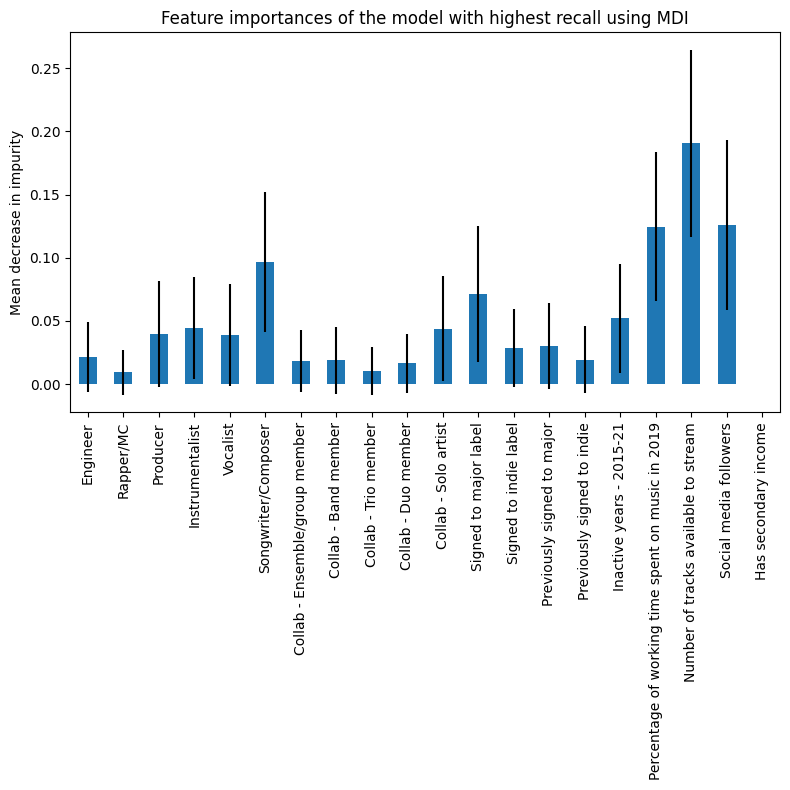

In [220]:
forest_importances = pd.Series(importances, index=X_e.columns)

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(8,8))
forest_importances.plot.bar(yerr=std, ax=ax)

plt.xticks(rotation=90)
ax.set_title("Feature importances of the model with highest recall using MDI")
ax.set_ylabel("Mean decrease in impurity")


fig.tight_layout()

/opt/conda/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning:

An input array is constant; the correlation coefficient is not defined.



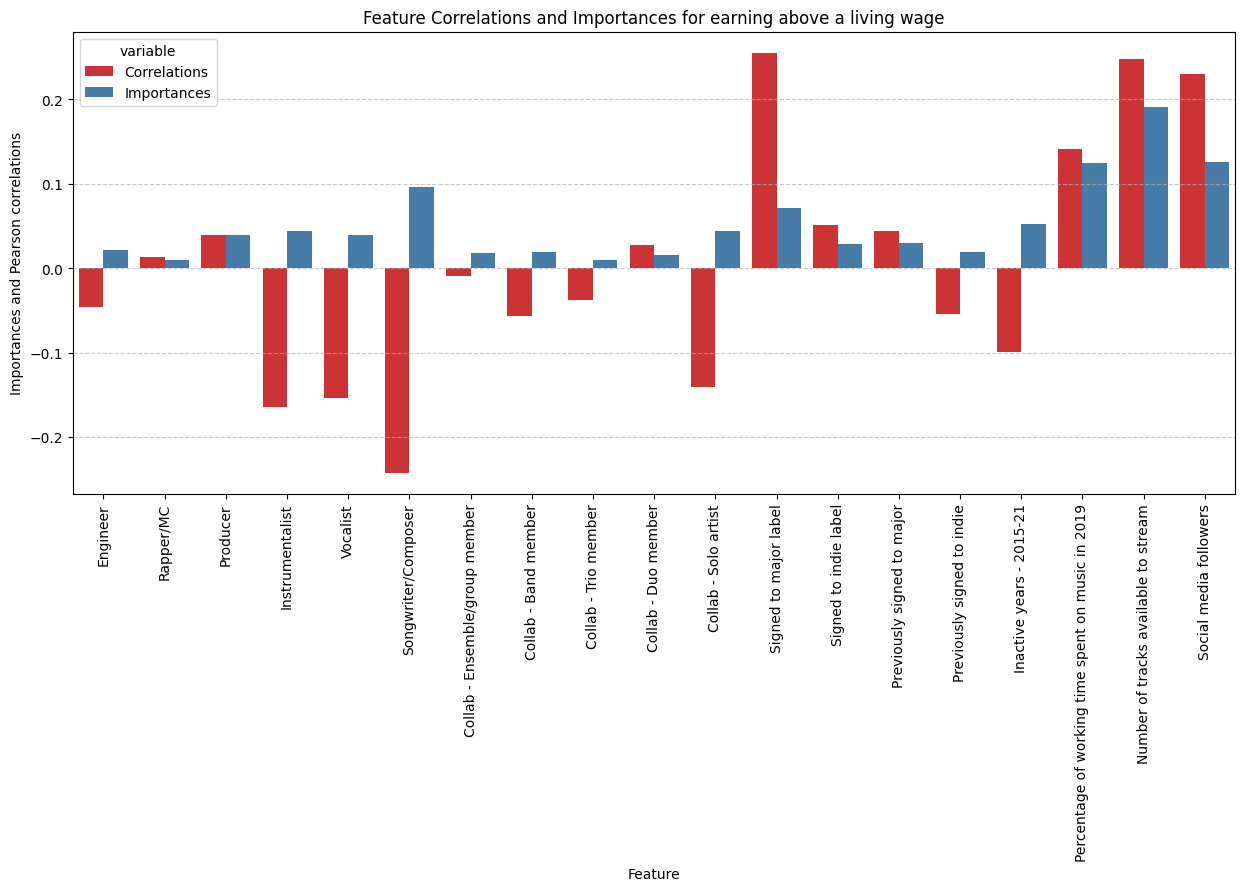

In [221]:
from scipy.stats import pearsonr

feature_names = []
correlations = []

for feature_name in df_ML_2_moretime_2income.columns:
    correlation, _ = pearsonr(df_ML_2_moretime_2income[feature_name], df_ML_2_moretime_2income[target])
    feature_names.append(feature_name)
    correlations.append(correlation)
    
correlations.pop()
feature_names.pop()

forest_correlations = pd.Series(correlations, index=feature_names)
df_forest_importances_correlations = pd.DataFrame(forest_correlations)
df_forest_importances_correlations['Importances']=forest_importances.values

df_forest_importances_correlations.rename(columns={0:'Correlations'}, inplace=True)
df_forest_importances_correlations.drop('Has secondary income', axis=0, inplace=True)

df_forest_importances_correlations['Feature'] = df_forest_importances_correlations.index

df_forest_importances_melted = df_forest_importances_correlations.melt(id_vars=['Feature'], value_vars=['Correlations', 'Importances'])

correlations_importances_chart = plt.figure(figsize=(15,6))
sns.barplot(data=df_forest_importances_melted, x='Feature', y='value', hue='variable', palette='Set1')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.ylabel('Importances and Pearson correlations')
plt.title('Feature Correlations and Importances for earning above a living wage')
plt.xticks(rotation=90)
plt.show()

<div style="background-color:Bisque;
            font-size:100%;
            font-family:Verdana;
            color:black;
            padding:20px;
            border-radius:5px;">
<p>This graph shows that the most important features with positive correlations to the target are:</p>
<ul>
    <li>Number of tracks available for streaming;</li>
    <li>Percentage of working time spent on music</li>
    <li>Number of social media followers;</li>
    <li>Being signed to a major label.</li>
    </ul>
<p>We already know from EDA that these are not strictly linear correlations.</p>

<p>It also shows that the most important features with negative correlations to the target are:</p>
<ul>
    <li>Being a songwriter/composer</li>
    <li>Number of inactive years in the last five years.</li>
    </ul>

</div>

# Summary of outcomes from EDA and classification learning

<div style="background-color:Bisque;
            font-size:100%;
            font-family:Verdana;
            color:black;
            padding:20px;
            border-radius:5px;">

<p>The model with highest recall could classify 53% of the true values present in the test data. This came at slight cost to overall accuracy compared to other models with lower recall. Given the need for the highest possible detection of true positives, this is a justifiable sacrifice.</p>
    
<p>EDA greatly reduced the number of columns in the dataframe from 132 to 23. The EDA revealed significant non-linear correlations which have proven important in the modelling.</p>

<p>The final most accurate model which improved recall from 0.33 in the first model to 0.53 was achieved by filtering for only those with both primary and secondary incomes from music, and who spend greater than 40% of their working time on music.</p>
    
The feature importances and correlations suggest that the most predictive features of a musician successfully earning over a living wage are:
    <ul>
        <li>Number of tracks available for streaming;</li>
        <li>Percentage of working time spent on music, where the EDA showed that those spending 60% of their working time earned the best across most metrics;</li>
        <li>Number of social media followers, where EDA showed that those with between 100,000 and 1,000,000 followers earned the best;</li>
        <li>Being signed to a major label.</li>
    </ul>
    
The feature importances and correlations suggest that the most predictive features of a musician earning less than a living wage are:
    <ul>
        <li>Identifying as a songwriter/composer;</li>
        <li>Number of inactive years in the last five.</li>
    </ul>
</div>